# 품목별 수출입실적

In [2]:
import pandas as pd

data_input_path = './data_input/'
data_output_path = './data_output/'

export_pd_total=pd.read_excel(data_input_path + "./file/성질별_수출입실적_202109252.xls", skiprows=[0,1,2,3,5])

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
export_pd_total.info() #기간을 제외하고..모두 문자열임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      273 non-null    float64
 1   수출입구분   273 non-null    object 
 2   성질명     273 non-null    object 
 3   중량      273 non-null    object 
 4   금액      273 non-null    object 
dtypes: float64(1), object(4)
memory usage: 10.8+ KB


In [4]:
export_pd_total['금액']=export_pd_total['금액'].str.replace(pat=r'[^A-Za-z0-9]', repl='', regex=True) #"," 제거
export_pd_total['금액'] = pd.to_numeric(export_pd_total['금액'])
export_pd_total['금액'].dtypes

dtype('int64')

In [5]:
export_pd_total.drop(export_pd_total.loc[export_pd_total['성질명'] == '3. 경공업품'].index, inplace=True)
export_pd_total.drop(export_pd_total.loc[export_pd_total['성질명'] == '4. 중화학 공업품'].index, inplace=True)

In [6]:
export_pd_total["품목명"]=export_pd_total["성질명"].str.split('.').str[1] #성질명 내용 변환

In [7]:
condition=(export_pd_total["기간"]>=2019.08) & (export_pd_total["기간"]<2020.02)
export_pd_2019=export_pd_total[condition].sort_values("금액", ascending=False)

pd.options.display.float_format = '{:.1f}'.format #지수 변경확인
#pd.set_option('display.float_format', None)
#2019년동 성질명을 기준으로 한 평균 수출금액
export_pd_2019_mean=export_pd_2019[["품목명","금액"]].groupby(['품목명']).mean().sort_values(by='금액' ,ascending=False)
export_sum = export_pd_2019_mean["금액"].sum()
export_pd_2019_mean["수출 비중"] =export_pd_2019_mean["금액"]/export_sum*100
export_pd_2019_mean

,금액,수출 비중
품목명,,
"전기, 전자제품",14323629.8,32.8
수송장비,7141410.3,16.3
기계류와 정밀기기,5602094.7,12.8
화공품,5508529.7,12.6
원료 및 연료,4090526.3,9.4
철강제품,3520307.0,8.1
기 타,964946.1,2.2
식료 및 직접소비재,677170.2,1.5
"가죽, 고무 및 신발류",388195.3,0.9


In [8]:
condition=(export_pd_total["기간"]>=2020.02) & (export_pd_total["기간"]<=2020.07)
export_pd_2020=export_pd_total[condition].sort_values("금액", ascending=False)

#2020년 2월 이후동 성질명을 기준으로 한 평균 수출금액
export_pd_2020_mean=export_pd_2020[["품목명","금액"]].groupby(['품목명']).mean().sort_values(by='금액' ,ascending=False)
export_sum_2020 = export_pd_2020_mean["금액"].sum()
export_pd_2020_mean["수출 비중"] =export_pd_2020_mean["금액"]/export_sum_2020*100
export_pd_2020_mean

,금액,수출 비중
품목명,,
"전기, 전자제품",13999583.7,35.8
수송장비,5668328.7,14.5
화공품,5211762.5,13.3
기계류와 정밀기기,5149482.5,13.2
철강제품,3136713.2,8.0
원료 및 연료,2504992.8,6.4
기 타,930020.0,2.4
식료 및 직접소비재,709653.8,1.8
"가죽, 고무 및 신발류",333905.7,0.9


In [9]:
#코로나 전, 코로나 이후 데이터프레임 합치기
merge_export = pd.merge(export_pd_2019_mean,export_pd_2020_mean, how="left",on='품목명')
merge_export=merge_export.rename(columns={"품목명":"성질명","금액_x":"코로나 이전 수출금액", "수출 비중_x":"코로나 이전 수출비중",
                           "금액_y":"코로나 이후 수출금액", "수출 비중_y":"코로나 이후 수출비중" })

merge_export["품목명"]=merge_export.index #인덱스를 칼럼으로 변경
merge_export = merge_export[["품목명", "코로나 이전 수출금액","코로나 이전 수출비중","코로나 이후 수출금액","코로나 이후 수출비중"]]
merge_export=merge_export.reset_index(drop=True) #인덱스 추가
merge_export.head()

,품목명,코로나 이전 수출금액,코로나 이전 수출비중,코로나 이후 수출금액,코로나 이후 수출비중
0,"전기, 전자제품",14323629.8,32.8,13999583.7,35.8
1,수송장비,7141410.3,16.3,5668328.7,14.5
2,기계류와 정밀기기,5602094.7,12.8,5149482.5,13.2
3,화공품,5508529.7,12.6,5211762.5,13.3
4,원료 및 연료,4090526.3,9.4,2504992.8,6.4


In [10]:
# 수출금액 차이 확인(원료 및 연료, 기계류 및 정밀기기, )
merge_export["코로나 전후 수출금액차"]=merge_export["코로나 이후 수출금액"]-merge_export["코로나 이전 수출금액"]
merge_export_final=merge_export.sort_values(by='코로나 전후 수출금액차' ,ascending=True)
merge_export_final

,품목명,코로나 이전 수출금액,코로나 이전 수출비중,코로나 이후 수출금액,코로나 이후 수출비중,코로나 전후 수출금액차
4,원료 및 연료,4090526.3,9.4,2504992.8,6.4,-1585533.5
1,수송장비,7141410.3,16.3,5668328.7,14.5,-1473081.7
2,기계류와 정밀기기,5602094.7,12.8,5149482.5,13.2,-452612.2
5,철강제품,3520307.0,8.1,3136713.2,8.0,-383593.8
0,"전기, 전자제품",14323629.8,32.8,13999583.7,35.8,-324046.2
3,화공품,5508529.7,12.6,5211762.5,13.3,-296767.2
9,직 물,374659.8,0.9,291495.3,0.7,-83164.5
8,"가죽, 고무 및 신발류",388195.3,0.9,333905.7,0.9,-54289.7
6,기 타,964946.1,2.2,930020.0,2.4,-34926.1
14,섬유사,106931.8,0.2,76855.2,0.2,-30076.7


품목별로 보면, 5월 기준 수출비중 상위 5개 품목 중 반도체(7.1%)가 소폭 오른 반면, 일반기계(-27.8%), 석유화학(-34.3%), 자동차(-54.1%), 철강(-34.8%) 등 4개 품목의 수출은 급감함

수출이 가장 감소한 품목은 석유제품(-69.9%), 자동차부품(-66.7%). 자동차(-54.1%) 순으로 나타났다.

- https://www.kita.net/cmmrcInfo/cmmrcNews/cmmrcNews/cmmrcNewsDetail.do?pageIndex=1&nIndex=58544&sSiteid=1(한국무역협회)

이는 코로나19로 인한 전 세계적 봉쇄조치와 사회적 거리 두기로 경제활동이 위축되면서 경기변동에 민감한 자동차, 자동차부품, 섬유, 철강 등 국내 주력 품목의 수출에 영향을 미침

코로나19로 인해 세계 경제의 불확실성이 커지면서 안전자산에 대한 선호에 따라 2020년 4월부터 금·은·백금 수출이 급증함

## 우리나라 품목별 수출비중

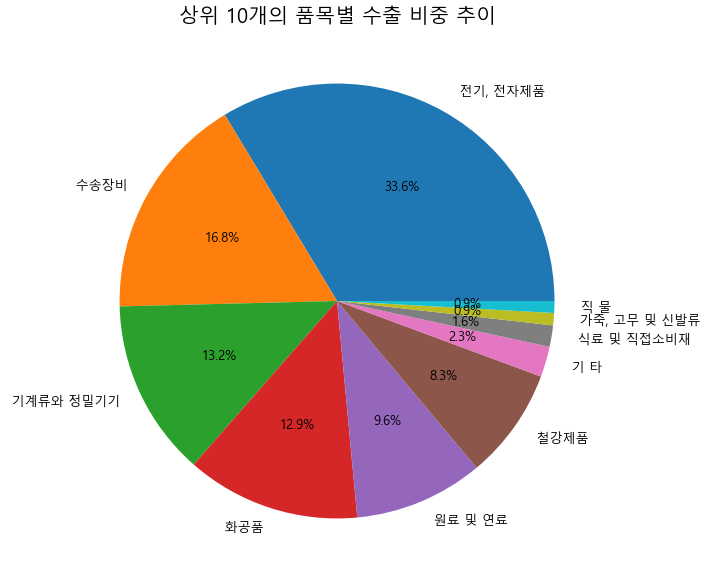

In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#폰트 설정
path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name, size=13)

#상위 품목별 수출비중 10
merge_export_pie=merge_export.sort_values(by='코로나 이전 수출비중' ,ascending=False)
merge_export_pie=merge_export_pie.head(10)
plt.figure(figsize=(30,10))
plt.title("상위 10개의 품목별 수출 비중 추이", fontsize=20)
plt.pie(merge_export_pie["코로나 이전 수출금액"], labels=merge_export_pie["품목명"], autopct='%1.1f%%')
plt.show()

## 코로나 전후 수출금액 추이

Text(0, 0.5, '수출금액')

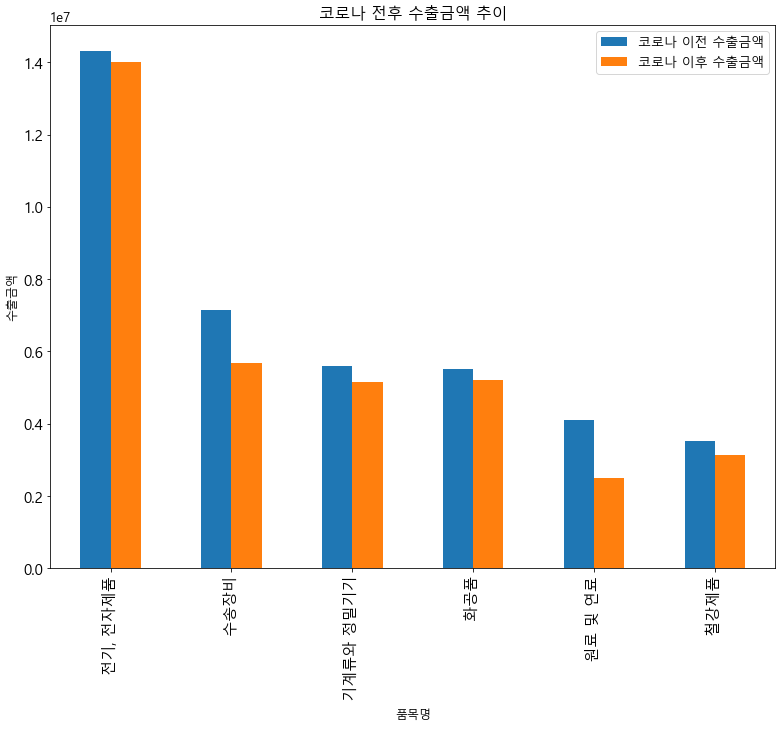

In [12]:
merge_export_5=merge_export.head(6)
merge_export_5=merge_export_5.set_index("품목명")[["코로나 이전 수출금액","코로나 이후 수출금액"]]

ax = merge_export_5.plot(kind='bar', title='코로나 전후 수출금액 추이', figsize=(13, 10), legend=True, fontsize=15)
ax.set_xlabel('품목명', fontsize=12)          # x축 정보 표시
ax.set_ylabel('수출금액', fontsize=12)     # y축 정보 표시

## 품목별 수출금액 변동 추이

In [13]:
df1=merge_export_final.head(3) 
df2=merge_export_final.tail(3)
result2 = pd.concat([df1,df2], ignore_index=True) #가장 위의 3개와 하단의 3개의 데이터프레임을 이어서 붙임
result2

,품목명,코로나 이전 수출금액,코로나 이전 수출비중,코로나 이후 수출금액,코로나 이후 수출비중,코로나 전후 수출금액차
0,원료 및 연료,4090526.3,9.4,2504992.8,6.4,-1585533.5
1,수송장비,7141410.3,16.3,5668328.7,14.5,-1473081.7
2,기계류와 정밀기기,5602094.7,12.8,5149482.5,13.2,-452612.2
3,의 류,153229.8,0.4,153008.3,0.4,-221.5
4,식료 및 직접소비재,677170.2,1.5,709653.8,1.8,32483.7
5,귀금속 및 보석류,182221.7,0.4,301502.3,0.8,119280.7


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


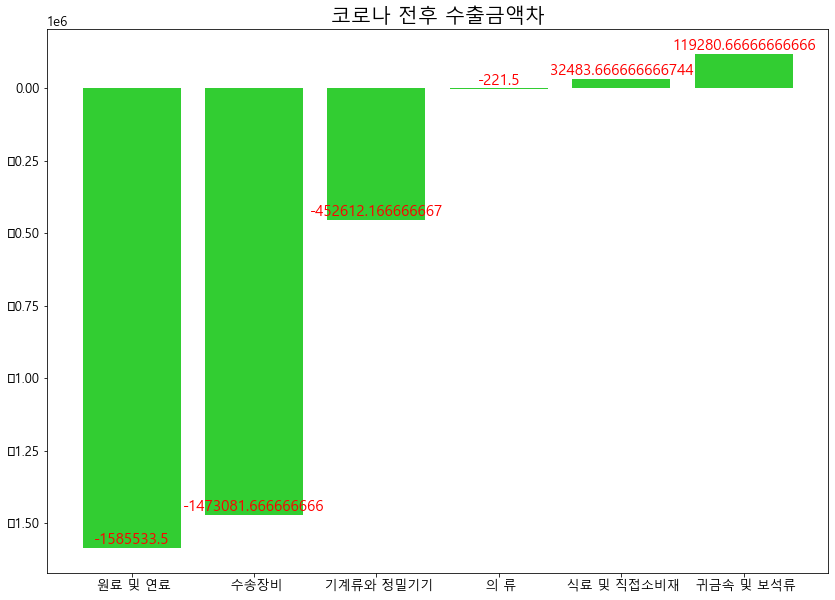

In [14]:
plt.figure(figsize=(14,10))
plt.title("코로나 전후 수출금액차", fontsize = 20)
x_data=result2["품목명"]
y_data=result2["코로나 전후 수출금액차"]
plt.bar(x_data,y_data,color='limegreen') #bar(막대를 표시할 위치, 막대의 높이)

for i, v in enumerate(x_data):
    plt.text(v, y_data[i], y_data[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center', 
             verticalalignment='bottom') 
plt.show()

# 석유제품(정유된 제품 HS CODE : 2710--) 조사

우리나라 제일의 수출품목이 “석유”라는 놀라운 사실! 알고 계셨나요?

우리나라의 석유제품 수출량은 반도체 및 자동차 수출 비중은 전체 수출의 10% 이상을 차지하고 있습니다
(석유화학제품까지 포함시키면 약 19%를 차지)

우리나라 정유산업은 원유의 정유공정을 통해 여러가지 석유제품을 얻음

특히 원유 속에 들어있는 여러 가지 성분을 유용한 성분(휘발유, 등유, 경유, 중유 등)으로 분류한 제품과 불순물을 제거(정제)하거나 배합과정으로 얻은 제품들을 통틀어 석유제품으로 분류함

우리나라 석유제품 수출국 순위는 중국(36.9%), 일본(14.4%), 호주(8.8%), 미국(8.6%), 싱가폴(6.9%) 순으로 집계됨(2021년 기준)

대한석유협회 관계자는 “우리 정유사는 세계 5위 수준의 정제능력을 갖추고 있어 규모의 경제 실현이 가능하다”며 “석유제품 수요와 정제마진이 코로나19 이전 수준을 회복하기에는 다소 시간이 걸리겠지만 정유업계는 수출국 다변화와 국가별 수급상황에 맞춘 전략으로 글로벌 수출시장에서 경쟁해 나갈 것”이라고 밝힘

In [15]:
import pandas as pd
oil_trade_world=pd.read_excel(data_input_path + "./file/Trade_Map_List_of_exporters_for_the_selected_product.xls.xlsx", skiprows=[i for i in range(10)])
oil_trade_world.rename(columns={"Exporters":"수출국가", "Exported value in 2019-M09":"2019-09","Exported value in 2019-M10":"2019-10",
                               "Exported value in 2019-M11":"2019-11", "Exported value in 2019-M12":"2019-12",
                               "Exported value in 2020-M01":"2020-01", "Exported value in 2020-M02":"2020-02", "Exported value in 2020-M03":"2020-03",
                               "Exported value in 2020-M04":"2020-04", "Exported value in 2020-M05":"2020-05", "Exported value in 2020-M06":"2020-06",
                               "Exported value in 2020-M07":"2020-07", "Exported value in 2020-M08":"2020-08"}, inplace=True) #칼럼명 변경
oil_trade_top=oil_trade_world.head(6)
oil_trade_top

,수출국가,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08
0,United States of America,7130081.0,7155486.0,7497227.0,8253071.0,7469257.0,7589559.0,6897315.0,4478148.0,2320100.0,3685098.0,4408155.0,4788086.0
1,Netherlands,4451683.0,4980915.0,4259883.0,4414259.0,4220848.0,3281521.0,3601791.0,1598865.0,1693371.0,2608986.0,2733973.0,2621577.0
2,Russian Federation,5975640.0,5431400.0,5405448.0,6121991.0,5343871.0,5064538.0,6070396.0,3357481.0,2816877.0,3210282.0,2816560.0,2466227.0
3,Singapore,3258047.0,4123956.0,3758476.0,3851768.0,3660444.0,2994776.0,2865463.0,1573542.0,1239147.0,1841634.0,2280136.0,2111352.0
4,"Korea, Republic of",3392261.0,3198578.0,3326639.0,3136949.0,3238804.0,2640531.0,2200589.0,1409320.0,1096076.0,1568299.0,1959125.0,1909639.0
5,China,3257418.0,2939981.0,4107251.0,3919240.0,3106194.0,3078963.0,3705094.0,3316770.0,1257680.0,1199767.0,1054764.0,1511162.0


## 코로나 전후 석유제품 수출추이 시각화

In [16]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#폰트 설정
path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name, size=13)

oil_trade_top_trans=oil_trade_top.transpose()
oil_trade_top_trans

,0,1,2,3,4,5
수출국가,United States of America,Netherlands,Russian Federation,Singapore,"Korea, Republic of",China
2019-09,7130081.0,4451683.0,5975640.0,3258047.0,3392261.0,3257418.0
2019-10,7155486.0,4980915.0,5431400.0,4123956.0,3198578.0,2939981.0
2019-11,7497227.0,4259883.0,5405448.0,3758476.0,3326639.0,4107251.0
2019-12,8253071.0,4414259.0,6121991.0,3851768.0,3136949.0,3919240.0
2020-01,7469257.0,4220848.0,5343871.0,3660444.0,3238804.0,3106194.0
2020-02,7589559.0,3281521.0,5064538.0,2994776.0,2640531.0,3078963.0
2020-03,6897315.0,3601791.0,6070396.0,2865463.0,2200589.0,3705094.0
2020-04,4478148.0,1598865.0,3357481.0,1573542.0,1409320.0,3316770.0
2020-05,2320100.0,1693371.0,2816877.0,1239147.0,1096076.0,1257680.0


In [17]:
oil_trade_top_trans.rename(columns=oil_trade_top_trans.iloc[0],inplace=True)
df = oil_trade_top_trans.drop(oil_trade_top_trans.index[0])
df.head()

,United States of America,Netherlands,Russian Federation,Singapore,"Korea, Republic of",China
2019-09,7130081.0,4451683.0,5975640.0,3258047.0,3392261.0,3257418.0
2019-10,7155486.0,4980915.0,5431400.0,4123956.0,3198578.0,2939981.0
2019-11,7497227.0,4259883.0,5405448.0,3758476.0,3326639.0,4107251.0
2019-12,8253071.0,4414259.0,6121991.0,3851768.0,3136949.0,3919240.0
2020-01,7469257.0,4220848.0,5343871.0,3660444.0,3238804.0,3106194.0


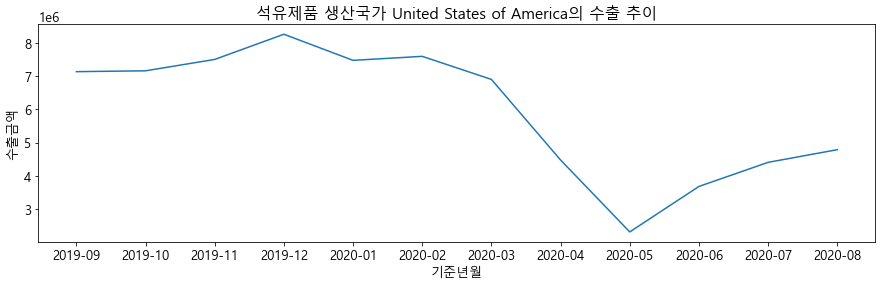

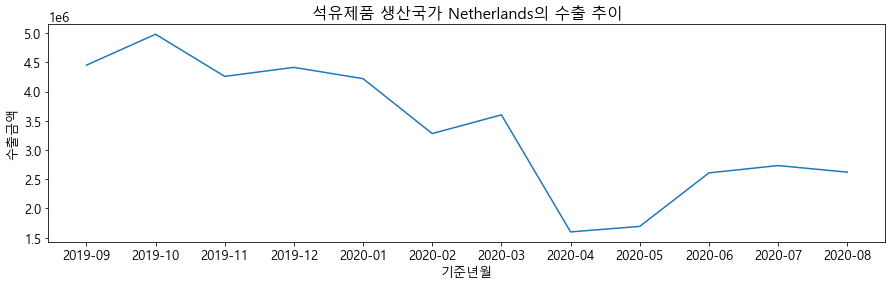

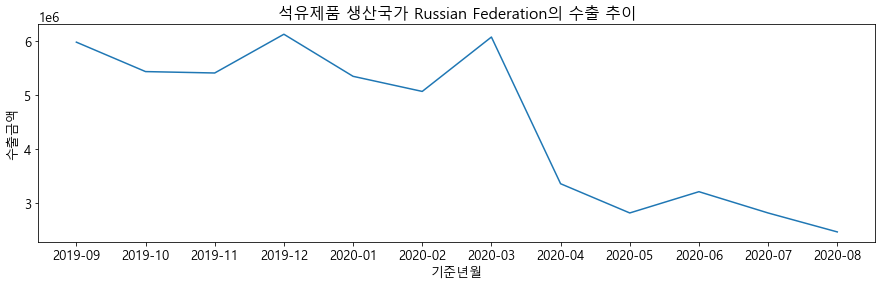

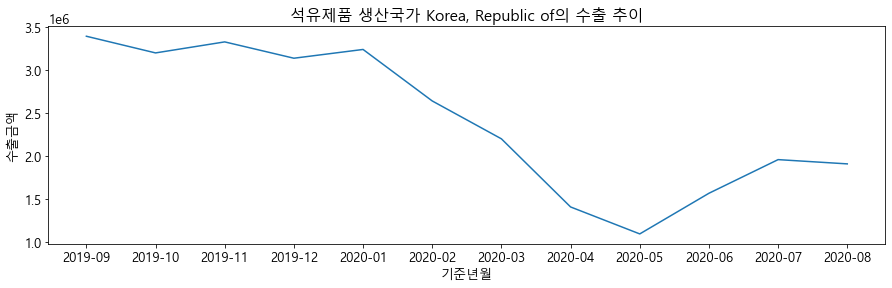

In [18]:
cntry_list= ["United States of America","Netherlands", "Russian Federation","Korea, Republic of"]
for cntry in cntry_list:
    df_filter=df[cntry]
    
    plt.figure(figsize=(15, 4))
    plt.plot(df_filter.index, df_filter)
    plt.title("석유제품 생산국가 {}의 수출 추이".format(cntry))
    plt.xlabel("기준년월")
    plt.ylabel("수출금액")
    plt.show()

## GUI

## 재동 

## 1. 시도별 수출현황 분석 (2019.08 ~ 2020.07)

In [19]:
import pandas as pd 

pd.set_option('mode.chained_assignment',  None)

In [20]:
data_input_path = './data_input/'
data_output_path = './data_output/'

df = pd.read_csv(data_input_path + '/inout_0807.csv',skiprows=[0,1,2,3,5])
df.head(5)

,기간,시도명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2019.1,강원도,"4,138","169,239","31,821","355,993","-186,754"
1,2019.1,경기도,"196,484","9,169,822","576,604","10,000,356","-830,534"
2,2019.1,경상남도,"39,920","3,023,712","92,060","1,777,717","1,245,995"
3,2019.1,경상북도,"38,231","3,311,092","58,833","1,332,702","1,978,390"
4,2019.1,광주광역시,"9,581","993,482","40,129","508,339","485,143"


· 문자형 -> 정수형으로 바꾸기 위한 사전 작업 

In [21]:
df['수출건수'] = df['수출건수'].str.replace(',', '')
df['수출금액'] = df['수출금액'].str.replace(',', '')

· 문자형 -> 정수형으로 변환 (to_numeric)

In [22]:
df['수출금액'] = pd.to_numeric(df['수출금액'])
df['수출건수'] = pd.to_numeric(df['수출건수'])

### 1) 코로나 전 (2019.08~2020.01)과 후(2020.02 ~ 2020.07) 데이터 분리 및 전처리

In [23]:
corona_before = [2019.08, 2019.09, 2019.10, 2019.11, 2019.12, 2020.01]

cb_condition = (df.기간.isin(corona_before) == True)
ca_condition = (df.기간.isin(corona_before) == False)
df_2019 = df[cb_condition].reset_index(drop=True)
df_2020 = df[ca_condition].reset_index(drop=True)

del df_2019['수입건수'],df_2019['수입금액'],df_2019['무역수지'],df_2019['기간']
del df_2020['수입건수'],df_2020['수입금액'],df_2020['무역수지'],df_2020['기간']

#### ·지역별로 그룹화하고, 해당 값들에 대한 평균을 구함 

In [24]:
corona_before = df_2019.groupby(df_2019.시도명).mean().round(2).reset_index()
corona_after = df_2020.groupby(df_2020.시도명).mean().round(2).reset_index()

corona_before.head()

,시도명,수출건수,수출금액
0,강원도,3916.3,168814.8
1,경기도,204898.2,9370152.2
2,경상남도,41831.8,3359309.8
3,경상북도,39009.2,3196695.8
4,광주광역시,9727.8,1059661.3


#### · 데이터 저장 (지도 생성에 사용하기 위함)

In [25]:
corona_before.to_csv(data_output_path + 'cb.csv',index=False)
corona_after.to_csv(data_output_path + 'ca.csv',index=False)

In [26]:
corona_before['수출금액 단위조정'] = round(corona_before['수출금액'] / 100000,0).astype(int)
corona_after['수출금액 단위조정'] = round(corona_after['수출금액'] / 100000,0).astype(int)

corona_before = corona_before.sort_values('수출금액', ascending=False).reset_index(drop=True)
corona_after = corona_after.sort_values('수출금액', ascending=False).reset_index(drop=True)

corona_after.head(5)
# corona_before.head()

,시도명,수출건수,수출금액,수출금액 단위조정
0,경기도,187776.2,9222601.7,92
1,충청남도,36575.8,6095978.2,61
2,울산광역시,19476.7,4340764.0,43
3,서울특별시,266129.5,4049922.3,40
4,인천광역시,172578.2,3068107.3,31


#### · 지도 시각화를 위해 위도 경도 정보 병합 

In [27]:
df_ll = pd.read_csv(data_input_path + 'city_ll.csv', header = 0)

df_ll['위도'] = df_ll['위도'].str.replace('N','')
df_ll['경도'] = df_ll['경도'].str.replace('E','')
df_ll['위도'] = df_ll['위도'].str.replace(',','.')
df_ll['경도'] = df_ll['경도'].str.replace(',','.')

corona_before = corona_before.merge(df_ll)
corona_after = corona_after.merge(df_ll)

corona_before.head()

,시도명,수출건수,수출금액,수출금액 단위조정,위도,경도,CTPRVN_CD
0,경기도,204898.2,9370152.2,94,37.41,127.51,41
1,충청남도,36915.2,6850398.3,69,36.51,126.80,44
2,울산광역시,21889.2,5647688.3,56,35.53,129.31,31
3,서울특별시,165795.7,4652330.0,47,37.56,126.97,11
4,경상남도,41831.8,3359309.8,34,35.46,128.21,48


In [28]:
# corona_before.to_csv('corona_before.csv',index=False)
# corona_after.to_csv('corona_after.csv', index=False)

#### 3) 코로나 발생 전, 후 차액을 보여주기 위한 새로운 데이터프레임 생성 

In [29]:
cb = pd.read_csv(data_output_path + 'cb.csv')
ca = pd.read_csv(data_output_path + 'ca.csv')

ca.head(2)

,시도명,수출건수,수출금액
0,강원도,3596.8,157219.5
1,경기도,187776.2,9222601.7


In [30]:
corona_total = cb

corona_total.rename(columns = {'수출건수': '코로나 이전 수출건수'}, inplace=True)
corona_total.rename(columns = {'수출금액': '코로나 이전 수출금액'}, inplace=True)

corona_total['코로나 이후 수출건수'] = ca['수출건수']
corona_total['코로나 이후 수출금액'] = ca['수출금액']
corona_total['차액'] = ca['수출금액'] - cb['코로나 이전 수출금액']

corona_total.to_csv(data_output_path + 'corona_total.csv',index=False)
corona_total.sort_values('차액', ascending=False).reset_index(drop=True).head(5)

,시도명,코로나 이전 수출건수,코로나 이전 수출금액,코로나 이후 수출건수,코로나 이후 수출금액,차액
0,충청북도,22377.3,1838334.7,21176.3,1948220.3,109885.7
1,대전광역시,7424.2,354868.0,7260.3,381039.0,26171.0
2,제주특별자치도,678.5,13662.0,484.0,10991.3,-2670.7
3,광주광역시,9727.8,1059661.3,9248.3,1053836.3,-5825.0
4,강원도,3916.3,168814.8,3596.8,157219.5,-11595.3


#### 4) 지도 제작용 데이터 새성 

In [31]:
city_code = []; city_name = [] 

for i in range(len(df_ll)):
    city_code.append(df_ll['CTPRVN_CD'][i])
    city_name.append(df_ll['시도명'][i])
    
del corona_total['코로나 이전 수출건수'], corona_total['코로나 이전 수출금액'], corona_total['코로나 이후 수출건수'],\
    corona_total['코로나 이후 수출금액']

corona_total['CTPRVN_CD'] = city_code
corona_total.to_csv(data_output_path+'corona_map.csv', index=False)

corona_total.head()

,시도명,차액,CTPRVN_CD
0,강원도,-11595.3,42
1,경기도,-147550.5,41
2,경상남도,-603563.7,48
3,경상북도,-322452.5,47
4,광주광역시,-5825.0,29


## 2. 코로나 전과 후 수출금액 차액이 큰 지역별 수출품목 분석 

### 1) 수출금액 차액이 큰 지역 조회

In [32]:
corona_map = pd.read_csv(data_output_path + 'corona_map.csv')

corona_map.sort_values('차액').head(3).reset_index(drop=True)

,시도명,차액,CTPRVN_CD
0,울산광역시,-1306924.3,31
1,충청남도,-754420.2,44
2,경상남도,-603563.7,48


### 2) 해당 지역 데이터셋 분석 및 전처리 

#### · 조회 대상 도시 정의

In [33]:
city_list = ['ulsan','chungnam','gyeongnam']   # 수출금액 하락 
city_list2 = ['chungbuk','daejun']   # 수출금액 상승 

#### · 데이터 전처리 작업 함수화 

In [34]:
def view_items(city_name):
    city = pd.read_csv(data_input_path + '{}.csv'.format(city_name),skiprows=[0,1,2,3,5])
    
    del city['Unnamed: 5'], city['Unnamed: 4']
    
    city.dropna(inplace=True)
    city.reset_index()

    city['수출품목건수'] = city['수출품목건수'].str.replace(',','').astype(int)
    city['수출금액'] = city['수출금액'].str.replace(',','').astype(int)
    
    corona_before = ['2019.08', '2019.09', '2019.10', '2019.11', '2019.12', '2020.01']

    cb_condition = (city.기간.isin(corona_before) == True)
    ca_condition = (city.기간.isin(corona_before) == False)

    city_before = city[cb_condition].reset_index(drop=True)
    city_after = city[ca_condition].reset_index(drop=True)

    del city_before['기간'], city_after['기간']
    
    idx_num1 = city_before[city_before['성질명'] == '3. 경공업품'].index
    idx_num2 = city_before[city_before['성질명'] == '4. 중화학 공업품'].index
    idx_num3 = city_after[city_after['성질명'] == '3. 경공업품'].index
    idx_num4 = city_after[city_after['성질명'] == '4. 중화학 공업품'].index

    city_before = city_before.drop(idx_num1)
    city_before = city_before.drop(idx_num2)
    city_after = city_after.drop(idx_num3)
    city_after = city_after.drop(idx_num4)
    
    city_before['성질명'] = city_before['성질명'].str.split('.').str[1]
    city_after['성질명'] = city_after['성질명'].str.split('.').str[1]
    
    city_before_total = city_before.groupby('성질명').mean().round(0).astype(int)
    city_after_total = city_after.groupby('성질명').mean().round(0).astype(int)

    city_before_total.reset_index(inplace=True)
    city_after_total.reset_index(inplace=True)

    city_before_total['수출금액_단위'] = (city_before_total['수출금액'] // 1000).astype(str)
    city_after_total['수출금액_단위'] = (city_after_total['수출금액'] // 1000).astype(str)
    
    city_before_total.to_csv(data_output_path + '/cbt.csv',index=False)
    city_after_total.to_csv(data_output_path + './cat.csv',index=False)
    
    cbt = pd.read_csv(data_output_path+'cbt.csv')
    cat = pd.read_csv(data_output_path+'cat.csv')
    
    city_total = cbt 
    
    del city_total['수출금액_단위']
    
    city_total.rename(columns = {'수출품목건수':'이전 수출 건수'}, inplace=True)
    city_total.rename(columns = {'수출금액':'이전 수출 금액'}, inplace=True)
    city_total['이후 수출 건수'] = cat['수출품목건수']
    city_total['이후 수출 금액'] = cat['수출금액']
    city_total['차액'] = cat['수출금액'] - cbt['이전 수출 금액']
    city_total['차액 단위'] = (city_total['차액'] // 1000).astype(str)
    
    for i in range(len(city_total)):
        if city_total['차액 단위'][i] == '0':
            city_total['차액 단위'][i] = '0원'
            continue
        city_total['차액 단위'][i] = city_total['차액 단위'][i] + '백만원'
    
    city_total.to_csv(data_output_path + '{}_total.csv'.format(city_name),index=False) 
    
    return city_total

In [35]:
ulsan_total = view_items('ulsan')
chungnam_total = view_items('chungnam')
gyeongnam_total = view_items('gyeongnam')
chungbuk_total = view_items('chungbuk')
daejun_total = view_items('daejun')

daejun_total

,성질명,이전 수출 건수,이전 수출 금액,이후 수출 건수,이후 수출 금액,차액,차액 단위
0,"가죽, 고무 및 신발류",151,2174,119,1312,-862,-1백만원
1,귀금속 및 보석류,1,560,1,1596,1036,1백만원
2,기 타,773,22866,764,27280,4414,4백만원
3,기계류와 정밀기기,2122,94755,1899,94947,192,0원
4,기타 비금속 광물제품,31,679,26,282,-397,-1백만원
5,기타 섬유제품,98,2267,125,2580,313,0원
6,목제품,27,119,24,146,27,0원
7,섬유사,184,2637,186,2430,-207,-1백만원
8,섬유원료,0,1,0,5,4,0원
9,수송장비,722,51180,545,21597,-29583,-30백만원


## 3. 시도 별 데이터 시각화  

### 1) 한글 폰트 설정, plt 파라미터 설정 

In [36]:
from matplotlib import font_manager, rc 
import platform
import matplotlib.pyplot as plt 

if platform.system() == 'Windows':
    path = 'c:\Windows\Fonts\malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font',faimly='AppleGothic')
else:
    print('Check your OS system')
    
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

### 2) 시각화 대상 데이터셋 조회

In [37]:
ulsan_total.sort_values('차액').head(3)
chungnam_total.sort_values('차액').head(3)
chungbuk_total.sort_values('차액').head(3)
gyeongnam_total.sort_values('차액').head(3)
daejun_total.sort_values('차액').head(3)

,성질명,이전 수출 건수,이전 수출 금액,이후 수출 건수,이후 수출 금액,차액,차액 단위
9,수송장비,722,51180,545,21597,-29583,-30백만원
0,"가죽, 고무 및 신발류",151,2174,119,1312,-862,-1백만원
4,기타 비금속 광물제품,31,679,26,282,-397,-1백만원


### 3) 코로나 발생 전, 후 특정 지역 차액 별 품목 Pie Chart 그리기

In [38]:
city_name = ['ulsan','chungnam','chungbuk','gyeongnam','daejun']

def show_piechart(city_name):
    city = pd.read_csv(data_output_path + '{}_total.csv'.format(city_name))
    minus_sum = 0; plus_sum = 0
    minus_label = []; plus_label = [] 
    
    # 차액이 음수인 것과 양수인 것 분리 
    idx_minus = city[city['차액'] < 0].index
    idx_plus = city[city['차액'] > 0].index
    
    city_minus = city.drop(idx_plus).reset_index(drop=True)
    city_plus = city.drop(idx_minus).reset_index(drop=True)
    
    city_minus['차액'] = city_minus['차액'].abs() 
    
    price_msum = sum(city_minus['차액'])
    price_psum = sum(city_plus['차액']) 
    
    city_minus['차액 비율(%)'] = round(city_minus['차액'] / price_msum * 100, 0).astype(int)
    city_plus['차액 비율(%)'] = round(city_plus['차액'] / price_psum * 100, 0).astype(int)
    
    city_minus = city_minus.sort_values('차액 비율(%)', ascending=False)
    city_plus = city_plus.sort_values('차액 비율(%)', ascending=False)
    
    idx_zero = city_minus[city_minus['차액 비율(%)'] == 0].index
    idx_zero2 = city_plus[city_plus['차액 비율(%)'] == 0].index
    
    city_minus = city_minus.drop(idx_zero).reset_index(drop=True)
    city_plus = city_plus.drop(idx_zero2).reset_index(drop=True)
    
    minus_ratio = city_minus['차액 비율(%)'].tolist()
    plus_ratio = city_plus['차액 비율(%)'].tolist()
    
    minus_label = city_minus['성질명']
    plus_label = city_plus['성질명']
    
    fig, axarr = plt.subplots(1, 2)
    ax1 = axarr[0]; ax2 = axarr[1]
    
    ax1.pie(minus_ratio, shadow=True, autopct='%1.1f%%')
    ax1.axis('equal')
    ax1.set_title('수출 차액 (손실)',fontsize=16, fontweight='bold')
    
    ax2.pie(plus_ratio, shadow=True, autopct='%1.1f%%')
    ax2.axis('equal')
    ax2.set_title('수출 차액 (이득)',fontsize=16, fontweight='bold')
    
    lgd1 = ax1.legend(minus_label, loc='best')
    lgd2 = ax2.legend(plus_label, loc='best')
    
    fig.suptitle('코로나 발생 전후 시도별 수출 차액 ({})'.format(city_name),fontsize=20,fontweight='bold')
    
    return city

,성질명,이전 수출 건수,이전 수출 금액,이후 수출 건수,이후 수출 금액,차액,차액 단위
0,"가죽, 고무 및 신발류",1258,2252,1016,1458,-794,-1백만원
1,귀금속 및 보석류,130,122271,124,156665,34394,34백만원
2,기 타,1099,17772,853,14570,-3202,-4백만원
3,기계류와 정밀기기,4147,240833,3589,219012,-21821,-22백만원
4,기타 비금속 광물제품,231,781,163,577,-204,-1백만원


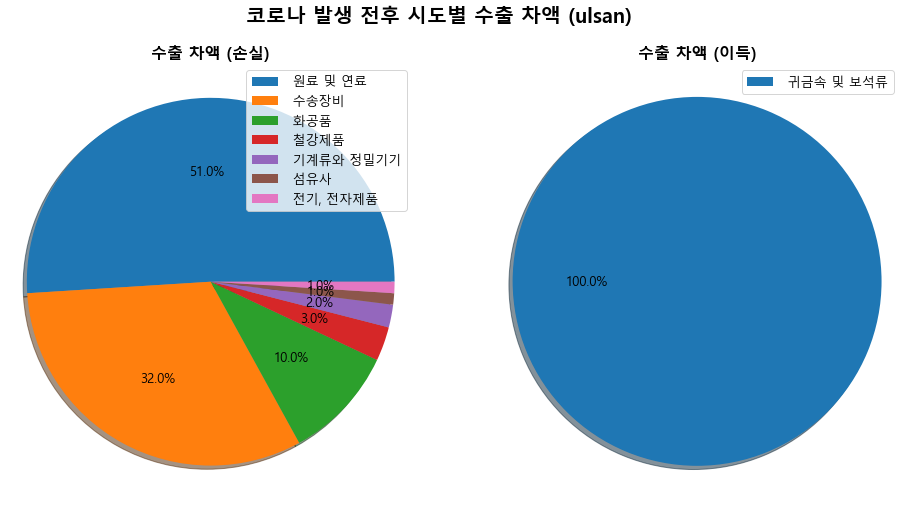

In [39]:
city = show_piechart('ulsan')
city.head(5)

### 4) 지역별 수출금액 변화 추이 시각화 (2019.08 ~ 2020.07)

In [40]:
def line_graph(city_name):
    city = pd.read_csv(data_input_path + '{}.csv'.format(city_name),skiprows=[0,1,2,3,5])
    
    del city['Unnamed: 5'], city['Unnamed: 4']
    city.dropna(inplace=True)
    city.reset_index()

    city['수출품목건수'] = city['수출품목건수'].str.replace(',','').astype(int)
    city['수출금액'] = city['수출금액'].str.replace(',','').astype(int)
    
    idx_num1 = city[city['성질명'] == '3. 경공업품'].index
    idx_num2 = city[city['성질명'] == '4. 중화학 공업품'].index
    
    city = city.drop(idx_num1)
    city = city.drop(idx_num2)
    
    del city['성질명']
    
    city = city.groupby('기간').mean().round(0).astype(int)
    city.reset_index(inplace=True)
    
    city['수출금액_단위'] = (city['수출금액'] // 1000).astype(int)

    plt.plot(city['기간'],city['수출금액'])
    plt.legend(['수출금액_단위(1,000 USD)'],fontsize=16)
    plt.title('시도별 2019.08 ~ 2020.07 수출금액 변동 ({})'.format(city_name), fontsize=20)
    plt.show()
    
    return city 

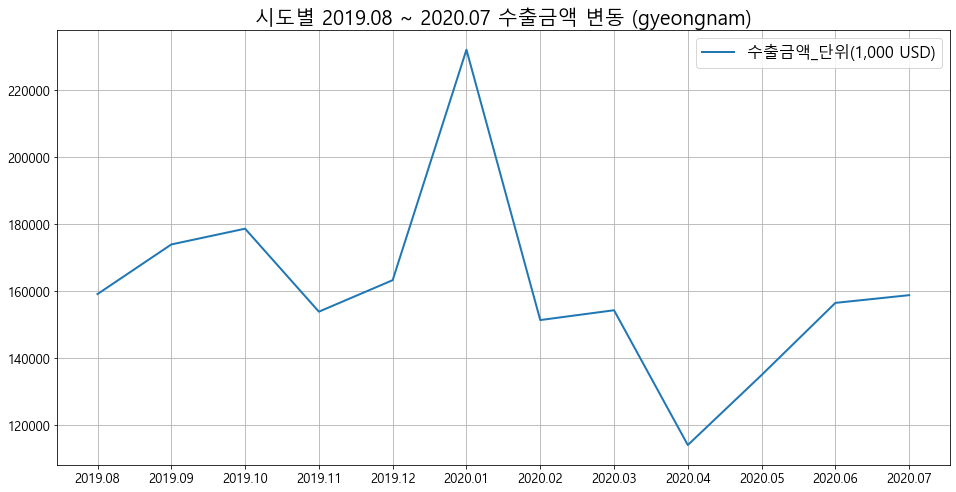

,기간,수출품목건수,수출금액,수출금액_단위
7,2020.03,3492,154323,154
8,2020.04,2730,114160,114
9,2020.05,2425,135023,135
10,2020.06,2982,156515,156
11,2020.07,3483,158816,158


In [41]:
city = line_graph('gyeongnam') 
city.tail()

### 울산 수출금액 하락 관련 뉴스 기사 조사 (2020.07.28)

한국무역협회 울산본부(본부장 김정철)가 발표한 ‘2020 상반기 울산 수출입동향’에 따르면, 상반기 울산 수출은 작년 동기대비 23.5% 
감소한 269억7900만 달러를 기록했다. 이는 2006년 상반기 이후 14년 만에 최저기록이다.

전국 17개 광역지자체 중 최대 수출 감소폭이다. 같은기간 국내 수출은 전년 동기 대비 11.3% 감소하는데 그쳤다.

품목별로는 울산의 최대 수출품목인 석유제품의 수출은 전년 동기 대비 39.4% 감소한 56억9700만 달러를 기록했다. 

코로나 확산에 따른 글로벌 석유수요 감소의 영향이 4월부터 본격 반영돼 국제유가(-37.9%) 및 수출단가(-33.8%)가 급락했고, 수출물량도 감소(-8.2%)했다. 석유화학제품도 전년 상반기 대비 23% 감소한 34억1000만 달러로 상반기 기준 2004년 이후 16년만에 최저치로 주저앉았다.

수출물량 증가(5.3%)에도 불구하고 글로벌 공급과잉 확대, 국제유가 급락 등의 영향으로 수출단가가 크게 하락(-26.8%)해 수출액이 줄었다.

자동차 수출은 최대 수출시장인 북미지역에서의 재고물량 증가 및 판매감소, 국내 생산 공장의 휴업 등의 영향으로 19.5% 감소한 68억9900만 달러를 기록했다. 다만, 전기자동차 수출은 유럽에서의 판매 호조에 힘입어 큰 폭으로 증가(9억4800만 달러, 39.7%)했다.

출처 : 경상일보(http://www.ksilbo.co.kr)

## 4. 지역별 데이터 차액 시각화 (choropleth) 

### 1) 라이브러리 import 

In [42]:
import pandas as pd 
import folium
import json
import os 
import plotly.express as px

### 2) geojson 데이터 import 

In [43]:
korea_province_path = data_input_path + 'TL_SCCO_CTPRVN_WGS84.json'   
korea_province_geo = json.load(open(korea_province_path, encoding='utf-8'))   # 인코딩 지정 필수 
korea_province_geo['features'][0]['properties']

{'CTPRVN_CD': '42', 'CTP_ENG_NM': 'Gangwon-do', 'CTP_KOR_NM': '강원도'}

### 3) 데이터 전처리

corona_map['마이너스차액'][i] = 0을 수행할 경우 setting with copy warning이 발생하는데, copy() 메서드를 이용하면 해결할 수 있음 

참고: https://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221817400937

In [44]:
corona_map = pd.read_csv(data_output_path + 'corona_map.csv',header=0)
corona_map.head(2)

corona_map['차액'] = corona_map['차액'].round(0).astype(int)   # 문자형 -> 정수형 
corona_map['차액변환'] = (corona_map['차액'] / 1000).round(0).astype(int)

# 코드가 숫자로 인식될 경우 오류가 발생 -> 문자형으로 바꿔줘야 함 !! 
corona_map['CTPRVN_CD'] = corona_map['CTPRVN_CD'].astype(str)

price_val = corona_map['차액'].tolist()

corona_map['마이너스차액'] = price_val
corona_map['플러스차액'] = price_val

for i in range(len(corona_map)): 
    if corona_map['마이너스차액'][i] > 0: 
        corona_map['마이너스차액'][i] = 0 
    elif corona_map['플러스차액'][i] < 0:
        corona_map['플러스차액'][i] = 0

corona_map['CTPRVN_CD'] = corona_map['CTPRVN_CD'].astype(str)
# corona_map.sort_values('차액',ascending=False).head(3).reset_index(drop=True)
corona_map

,시도명,차액,CTPRVN_CD,차액변환,마이너스차액,플러스차액
0,강원도,-11595,42,-12,-11595,0
1,경기도,-147550,41,-148,-147550,0
2,경상남도,-603564,48,-604,-603564,0
3,경상북도,-322452,47,-322,-322452,0
4,광주광역시,-5825,29,-6,-5825,0
5,대구광역시,-122555,27,-123,-122555,0
6,대전광역시,26171,30,26,0,26171
7,부산광역시,-206548,26,-207,-206548,0
8,서울특별시,-602408,11,-602,-602408,0
9,세종특별자치시,-12334,36,-12,-12334,0


In [45]:
corona_tmp = pd.read_csv(data_output_path + 'corona_tmp.csv')

corona_tmp['마이너스차액'] = corona_map['차액']
corona_tmp['플러스차액'] = corona_map['차액']

for i in range(len(corona_tmp)): 
    if corona_tmp['마이너스차액'][i] > 0: 
        corona_tmp['마이너스차액'][i] = 0 
    elif corona_tmp['플러스차액'][i] < 0:
        corona_tmp['플러스차액'][i] = 0

corona_tmp['CTPRVN_CD'] = corona_tmp['CTPRVN_CD'].astype(str)
corona_tmp.head(2)

,시도명,차액,CTPRVN_CD,차액변환,마이너스차액,플러스차액
0,강원도,-11595,42,-12,-11595,0
1,경기도,-147550,41,-148,-147550,0


### 4) 코로나발생 전·후 수출금액 차액 비교 (손실 지역) 

#### · tiles = OpenStreetMap, CartoDB dark_matter, Stamen Toner
#### · fill_color = YlGn, BuPu 

In [46]:
minus_m = folium.Map(location=[36,128],tiles='OpenStreetMap', zoom_start=7)

tmp = folium.Choropleth(
    geo_data=korea_province_geo,
    data = corona_map,
    columns = ('CTPRVN_CD','마이너스차액'),
    key_on = 'feature.properties.CTPRVN_CD',
    fill_color='YlGn', 
    fill_opacity=0.6,
    line_opacity=0.5,
    highlight = True,
    legend_name='코로나로 인한 수출 차액',
).add_to(minus_m)

# 색칠한 Layer 켜고 끄기 버튼 추가 
folium.LayerControl(collapsed=True).add_to(minus_m)

# label 추가하기 
tmp.geojson.add_child(
    folium.features.GeoJsonTooltip(['CTP_KOR_NM'], labels=False)
)

minus_m.save(data_output_path + 'minus_map.html')
minus_m

### 5) 코로나발생 전·후 수출금액 차액 비교 (이득 지역) 

In [47]:
plus_m = folium.Map(location=[36,128],tiles='OpenStreetMap', zoom_start=7)

tmp = folium.Choropleth(
    geo_data=korea_province_geo,
    data = corona_map,
    columns = ('CTPRVN_CD','플러스차액'),
    key_on = 'feature.properties.CTPRVN_CD',
    fill_color='YlGn',
    fill_opacity=0.6,
    line_opacity=0.5,
    highlight = True,
    legend_name='코로나로 인한 수출 차액',
).add_to(plus_m)

folium.LayerControl(collapsed=True).add_to(plus_m)

tmp.geojson.add_child(
    folium.features.GeoJsonTooltip(['CTP_KOR_NM'], labels=False)
)

plus_m.save(data_output_path + 'plus_map.html')
plus_m

### 6) 코로나 발생 이전 시도별 수출금액 시각화 

In [48]:
south_Kor = [36, 128]
map_Kor = folium.Map(location=south_Kor, zoom_start = 7)

for i in range(len(corona_before)):
    name = corona_before['시도명'][i]
    count = corona_before['수출금액'][i]
    size = int(count) / 500000
    long = float(corona_before['위도'][i])
    lat = float(corona_before['경도'][i])
    folium.CircleMarker((long, lat), radius = size, color='red', popup=[name, count]).add_to(map_Kor)

map_Kor

#### folium, choropleth 출처
https://www.nagarajbhat.com/post/folium-visualization/ -> 향후 추가 응용할 때 참고 가능
https://mjs1995.tistory.com/182
https://blog.naver.com/PostView.nhn?blogId=kcchang61&logNo=221350672356
https://anweh.tistory.com/55

### 7) 코로나 발생 이후 시·도 별 수출금액 시각화 

In [49]:
for i in range(len(corona_after)):
    name = corona_after['시도명'][i]
    count = corona_after['수출금액'][i]
    size = int(count) / 500000
    long = float(corona_after['위도'][i])
    lat = float(corona_after['경도'][i])
    folium.CircleMarker((long, lat), radius = size, color='red', popup=[name,count]).add_to(map_Kor)

map_Kor

### GUI 

## 한선희 - 

# 국가별 수출입실적

#### 관세청 수출입무역통계
+ https://unipass.customs.go.kr/ets/        

In [50]:
import pandas as pd
country_file = pd.read_csv(data_input_path + "./국가별_수출입_실적_2019_08~2020_07.csv", skiprows = range(5,6), header = 4, thousands=',')
country_file = country_file.drop(country_file.columns[6], axis = 1) # 무역수지 제외
country_file.head()
# 단위 : 천 불(USD 1,000)

,기간,국가명,수출건수,수출금액,수입건수,수입금액
0,2019.1,중국,235133,11287793,294380,8312968
1,2019.1,미국,85255,5619803,1038766,5175083
2,2019.1,베트남,55949,4484556,35625,1989497
3,2019.1,홍콩,25344,2578176,18558,138092
4,2019.1,일본,88150,2243165,116601,3886997


### 코로나 전후 국가별 수출입 실적

###### 코로나 이전 6개월 (2019.08-2020.01)

In [51]:
before_condition = (2019.08 <= country_file['기간']) & (country_file['기간'] < 2020.02)
before_corona = country_file[before_condition]
before_corona.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액
0,2019.1,중국,235133,11287793,294380,8312968
1,2019.1,미국,85255,5619803,1038766,5175083
2,2019.1,베트남,55949,4484556,35625,1989497
3,2019.1,홍콩,25344,2578176,18558,138092
4,2019.1,일본,88150,2243165,116601,3886997


##### 코로나 이후 6개월 (2020.02-2020.07)

In [52]:
after_condition = (2020.02 <= country_file['기간']) & (country_file['기간'] < 2020.08)
after_corona = country_file[after_condition].reset_index(drop = True)
after_corona.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액
0,2020.0,중국,145546,8824933,161810,5553041
1,2020.0,미국,88394,5931572,1356389,5435012
2,2020.0,베트남,53969,3931517,35433,1498133
3,2020.0,홍콩,23237,2546966,27632,129395
4,2020.0,일본,121121,2265045,136473,3771979


### 코로나 발생 전후 국가별 수입 실적

In [53]:
# 코로나 이전 수입 실적 상위 10개국
import_before_corona=before_corona.groupby(['국가명']).sum().reset_index()
import_before_corona=import_before_corona.sort_values(by='수입금액', ascending=False).reset_index(drop = True).iloc[:,[0,4,5]].head(10)
import_before_corona

,국가명,수입건수,수입금액
0,중국,1981820,53144032
1,미국,6796008,31618343
2,일본,753518,22137088
3,베트남,213140,11139897
4,호주,301999,10787156
5,사우디아라비아,3571,10569207
6,독일,1210799,10126181
7,대만,145248,8235529
8,러시아 연방,12071,7486031
9,카타르,1106,6441331


In [54]:
 # 코로나 이후 수입 실적 상위 10개국
import_after_corona=after_corona.groupby(['국가명']).sum().reset_index()
import_after_corona=import_after_corona.sort_values(by='수입금액', ascending=False).reset_index(drop = True).iloc[:,[0,4,5]].head(10)
import_after_corona

,국가명,수입건수,수입금액
0,중국,2027339,51239509
1,미국,7329676,29184053
2,일본,889714,22691919
3,독일,1317327,10384631
4,베트남,248449,9974540
5,호주,323760,8531547
6,대만,141874,8274921
7,사우디아라비아,2918,7533822
8,러시아 연방,12072,5400849
9,말레이시아,67948,4119046


In [55]:
#그래프를 위한 한글
from matplotlib import font_manager, rc

path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font',family = font_name)

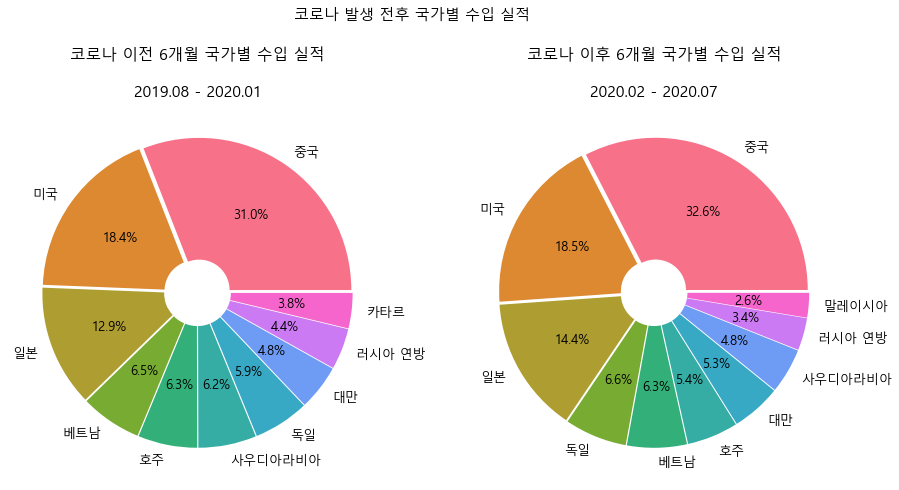

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

wg = {'width' : 0.8,'linewidth':3}
explode=[0.02] * 10 # 상위 10개국
colors = sns.color_palette('husl', len(import_before_corona['국가명']))

plt.figure(figsize=(15,10))
plt.suptitle('코로나 발생 전후 국가별 수입 실적', fontsize=15, y=0.9)

plt.subplot(1,2,1)
plt.title('코로나 이전 6개월 국가별 수입 실적\n\n2019.08 - 2020.01')
plt.pie(import_before_corona['수입금액'],labels=import_before_corona['국가명'],autopct='%.1f%%',explode = explode, colors = colors, wedgeprops=wg) # 이전
# plt.legend(import_before_corona['국가명'])

plt.subplot(1,2,2)
plt.title('코로나 이후 6개월 국가별 수입 실적\n\n2020.02 - 2020.07')
plt.pie(import_after_corona['수입금액'],labels=import_after_corona['국가명'],autopct='%.1f%%',explode = explode, colors = colors, wedgeprops=wg) # 이후
plt.savefig(data_output_path+'import_before_after.png') # GUI에서 시각화 자료 확인
plt.show()

파이 차트를 통해 코로나 발생 전후 수입 실적에서 중국, 미국, 일본이 상위를 차지하고 있는 것을 알 수 있다.          
하지만 코로나 발생 전후 수입금액 차이가 큰 상위 10개국을 통해 전반적으로 수입 실적이 감소한 것을 알 수 있다.

In [57]:
!pip install dataframe_imagex

ERROR: Could not find a version that satisfies the requirement dataframe_imagex
ERROR: No matching distribution found for dataframe_imagex


In [58]:
import dataframe_image as dfi
import_compare = pd.merge(left = import_before_corona, right = import_after_corona, how='inner', on='국가명')
import_compare.columns = ['국가명','코로나 이전 수입건수','코로나 이전 수입금액','코로나 이후 수입건수','코로나 이후 수입금액']
import_compare['코로나 전후 수입건수차'] = import_compare['코로나 이후 수입건수'] - import_compare['코로나 이전 수입건수']
import_compare['코로나 전후 수입금액차'] = import_compare['코로나 이후 수입금액'] - import_compare['코로나 이전 수입금액']
import_compare=import_compare.sort_values(by='코로나 전후 수입금액차', ascending = True).reset_index(drop=True)
import_compare
dfi.export(import_compare, data_output_path+'import_compare_df.png')

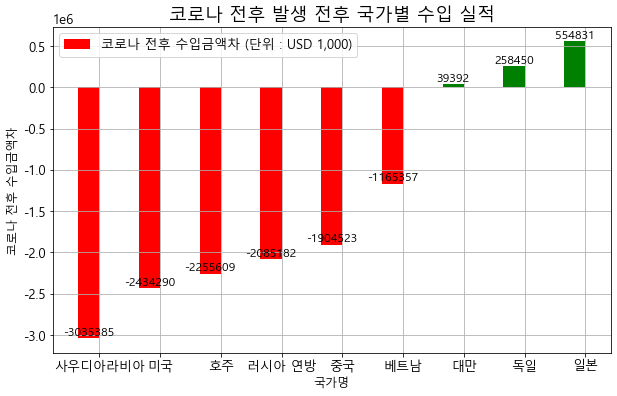

In [59]:
# 그래프 생성
import numpy as np
import matplotlib.pyplot as plt
def import_compare_graph():
    bar_width = 0.35 # 막대 그래프 너비값
    index = np.arange(len(import_compare['국가명']))
    plt.rcParams['axes.unicode_minus'] = False
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot()
    bars = plt.bar(index, import_compare['코로나 전후 수입금액차'], bar_width, align = 'edge',label = '코로나 전후 수입금액차 (단위 : USD 1,000)'
           ,color = ['r' if v < 0 else 'g' for v in import_compare['코로나 전후 수입금액차']])
    for i,b in enumerate(bars):
        ax.text(b.get_x() + b.get_width() * (1/2), b.get_height() + 0.1, import_compare['코로나 전후 수입금액차'].loc[i],fontsize=12, horizontalalignment='center', 
             verticalalignment='bottom') # 값 명시
    plt.title('코로나 전후 발생 전후 국가별 수입 실적', fontsize = 18)
    plt.ylabel('코로나 전후 수입금액차', fontsize = 12)
    plt.xlabel('국가명', fontsize = 12)
    plt.xticks(index + bar_width, import_compare['국가명'])
    plt.legend()
    plt.savefig(data_output_path + 'import_compare.png')
    plt.show()
    
import_compare_graph()

전반적으로 코로나 발생 이전에 비해 수입 실적이 크게 줄었으며 그 중 사우디아라비아 수입금액차가 가장 크게 나타났다.                               
이러한 코로나 발생 이후 수입금액에 영향을 끼친 주요 수입품목을 사우디아라비아 품목별 수입 실적을 통해 알아보고자 한다.

#### 사우디아라비아 품목별 수입 실적

In [60]:
import pandas as pd
import_saudi = pd.read_csv(data_input_path + "./사우디아라비아 품목별 수입실적_2019_08~2020_07.csv", skiprows = range(5,6), header = 4, thousands=',')
import_saudi.head(10)

,기간,수출입구분,국가명,성질명,중량,금액
0,2019.1,수입,사우디아라비아,1. 소비재,83.5,438
1,2019.1,수입,사우디아라비아,나. 직접소비재,76.7,418
2,2019.1,수입,사우디아라비아,다. 내구소비재,1.8,18
3,2019.1,수입,사우디아라비아,라. 비내구 소비재,0.1,3
4,2019.1,수입,사우디아라비아,마. 간이세율 적용분,4.9,0
5,2019.1,수입,사우디아라비아,2. 원자재,4566411.1,2258791
6,2019.1,수입,사우디아라비아,가. 연 료,4498490.0,2201616
7,2019.1,수입,사우디아라비아,나. 광 물,5846.3,15029
8,2019.1,수입,사우디아라비아,다. 경공업 원료,78.0,50
9,2019.1,수입,사우디아라비아,마. 섬유류,19.5,43


In [61]:
# 사우디아라비아 품목별 수입 실적
import_saudi = pd.read_csv(data_input_path +"./사우디아라비아 품목별 수입실적_2019_08~2020_07.csv", skiprows = range(5,6), header = 4, thousands=',').iloc[:,[0,3,4,5]]
import_saudi.columns=['기간','품목명','수입중량','수입금액']
condition1 = (import_saudi['품목명'] == '1. 소비재')
import_saudi.drop(import_saudi.loc[condition1].index, inplace=True)
condition2 = (import_saudi['품목명'] == '2. 원자재')
import_saudi.drop(import_saudi.loc[condition2].index, inplace=True)
condition3 = (import_saudi['품목명'] == '3. 자본재')
import_saudi.drop(import_saudi.loc[condition3].index, inplace=True)
import_saudi.head(10)

,기간,품목명,수입중량,수입금액
1,2019.1,나. 직접소비재,76.7,418
2,2019.1,다. 내구소비재,1.8,18
3,2019.1,라. 비내구 소비재,0.1,3
4,2019.1,마. 간이세율 적용분,4.9,0
6,2019.1,가. 연 료,4498490.0,2201616
7,2019.1,나. 광 물,5846.3,15029
8,2019.1,다. 경공업 원료,78.0,50
9,2019.1,마. 섬유류,19.5,43
10,2019.1,바. 화공품,60975.4,40069
11,2019.1,사. 철강재,7.9,29


In [62]:
# 코로나 이전 사우디아라비아 수입 실적
before_condition = (2019.08 <= import_saudi['기간']) & (import_saudi['기간'] < 2020.02)
saudi_before_corona = import_saudi[before_condition]

# 코로나 이전 수입 실적 상위 10개 품목
import_saudi_before_corona=saudi_before_corona.groupby(['품목명']).sum().reset_index()
import_saudi_before_corona=import_saudi_before_corona.sort_values(by='수입금액', ascending=False).reset_index(drop = True).iloc[:,[0,2,3]].head(10)
import_saudi_before_corona

,품목명,수입중량,수입금액
0,가. 연 료,20869942.6,10198286
1,바. 화공품,453356.3,243217
2,나. 광 물,35337.3,96827
3,아. 비철금속,12002.9,23392
4,사. 철강재,179.6,2571
5,나. 직접소비재,322.0,1908
6,가. 기계류와 정밀기기,141.1,976
7,자. 기 타,168.5,970
8,다. 경공업 원료,568.8,424
9,나. 전기·전자기기,11.7,299


In [63]:
# 코로나 이후 사우디아라비아 수입 실적
after_condition = (2020.02 <= import_saudi['기간']) & (import_saudi['기간'] < 2020.08)
saudi_after_corona = import_saudi[after_condition]

# 코로나 이후 수입 실적 상위 10개 품목
import_saudi_after_corona=saudi_after_corona.groupby(['품목명']).sum().reset_index()
import_saudi_after_corona=import_saudi_after_corona.sort_values(by='수입금액', ascending=False).reset_index(drop = True).iloc[:,[0,2,3]].head(10)
import_saudi_after_corona

,품목명,수입중량,수입금액
0,가. 연 료,23665948.6,7096550
1,바. 화공품,572787.1,234002
2,다. 수송장비,106912.5,105414
3,나. 광 물,25842.2,59693
4,아. 비철금속,18854.0,31207
5,사. 철강재,156.5,2536
6,나. 직접소비재,319.3,1808
7,자. 기 타,185.4,819
8,다. 경공업 원료,734.7,815
9,나. 전기·전자기기,78.8,335


In [64]:
import_saudi_compare = pd.merge(left = import_saudi_before_corona, right = import_saudi_after_corona, how='inner', on = '품목명')
import_saudi_compare.columns = ['품목명','코로나 이전 수입건수','코로나 이전 수입금액','코로나 이후 수입건수','코로나 이후 수입금액']
import_saudi_compare['코로나 전후 수입건수차'] = import_saudi_compare['코로나 이후 수입건수'] - import_saudi_compare['코로나 이전 수입건수']
import_saudi_compare['코로나 전후 수입금액차'] = import_saudi_compare['코로나 이후 수입금액'] - import_saudi_compare['코로나 이전 수입금액']
import_saudi_compare=import_saudi_compare.sort_values(by='코로나 전후 수입금액차', ascending = True).reset_index(drop=True)

# 품목명 : 가. 연료 -> 연료로 변경
def rename_item(item):
    return item.split('. ')[1]
import_saudi_compare['품목명'] = import_saudi_compare['품목명'].apply(rename_item)
import_saudi_compare
dfi.export(import_saudi_compare, data_output_path+'import_saudi_compare_df.png')

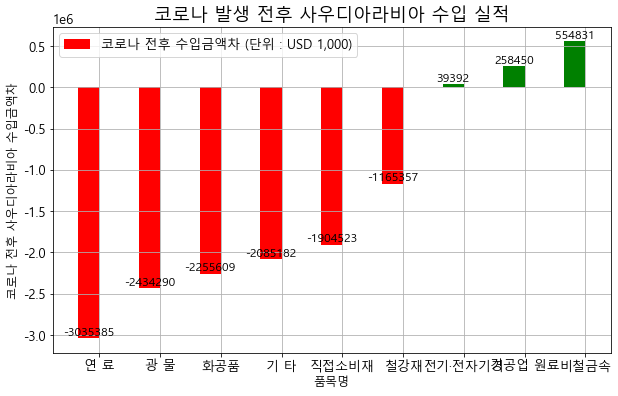

In [65]:
# 그래프 생성
import numpy as np
import matplotlib.pyplot as plt
def import_saudi_compare_graph():
    bar_width = 0.35 # 막대 그래프 너비값
    index = np.arange(len(import_saudi_compare['품목명']))
    plt.rcParams['axes.unicode_minus'] = False
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot()
    bars = plt.bar(index, import_compare['코로나 전후 수입금액차'], bar_width, align = 'edge',label = '코로나 전후 수입금액차 (단위 : USD 1,000)'
           ,color = ['r' if v < 0 else 'g' for v in import_compare['코로나 전후 수입금액차']])
    for i,b in enumerate(bars):
        ax.text(b.get_x() + b.get_width() * (1/2), b.get_height() + 0.1, import_compare['코로나 전후 수입금액차'].loc[i],fontsize=12, horizontalalignment='center', 
             verticalalignment='bottom') # 값 명시
    plt.title('코로나 발생 전후 사우디아라비아 수입 실적', fontsize = 18)
    plt.ylabel('코로나 전후 사우디아라비아 수입금액차', fontsize = 12)
    plt.xlabel('품목명', fontsize = 12)
    plt.xticks(index + bar_width, import_saudi_compare['품목명'])
    plt.legend()
    plt.savefig(data_output_path+'import_saudi_compare.png')
    plt.show()
import_saudi_compare_graph()

수입금액차가 가장 큰 연료는 관세청 코드에 따르면 에너지류(원유, 석탄, 가스), 석유제품(나프타, 방카C유, 등유, 기타)으로 구성되어있다.

//new
사우디아라비아는 석유 부문이 정부 재정 수입의 70% 이상을 차지하는 석유 의존형 국가이다.          
사우디 수출의 상당 부분은 비정제 원유가 차지하는데 비정제 원유는 정제를 거쳐 전력생산과 운송수단 연료 등에 쓰이는 디젤, 가솔린, 연료유 등 석유제품으로 가공된다.            
사우디는 기존 주문받은 원유를 차질없이 공급하여 세계 최대 원유수출국 지위를 놓치지 않기 위해 국내에서 사용할 양까지 모두 수출하고 국내용 석유는 별도의 정제 과정을 거치지 않고 바로 사용할 수 있는 정유 과정을 거친 석유제품을 수입해 충당한다.           
                           
허나 2020년 3~4월 사우디아라비아와 러시아 간 원유 감산 합의 결렬로 인해 벌어진 '유가 전쟁' 영향으로 유가가 20년만에 최저치로 폭락하였다. 이후 사우디는 석유 정책을 조정하기 위해 만들어진 OPEC과 10개 주요 산유국의 연대체와의 합의를 통해 매일 250만 배럴을 감축하고 하루 생산량을 1100만 배럴을 기준선으로 감축하기로 하였다.
                  
이러한 원유 최대 수입국인 사우디아라비아의 원유 생산량 감축 및 지속되는 코로나19로 인한 원유 수요 감소로 연료 수입이 크게 감소하였음을 알 수 있다.

+ https://newsis.com/view/?id=NISX20200729_0001111225
+ https://www.bbc.com/korean/news-52267225

### 코로나 발생 전후 국가별 수출 실적

In [66]:
# 코로나 이전 수출 실적 상위 10개국
export_before_corona=before_corona.groupby(['국가명']).sum().reset_index()
export_before_corona=export_before_corona.sort_values(by='수출금액', ascending=False).reset_index(drop = True).iloc[:,[0,2,3]].head(10)
export_before_corona

,국가명,수출건수,수출금액
0,중국,1586214,68721905
1,미국,549153,36092018
2,베트남,332506,24935644
3,홍콩,147262,15140658
4,일본,732898,14068359
5,대만,157971,8021912
6,인도,110346,6934886
7,싱가포르,178420,6147505
8,말레이시아,84509,5899540
9,멕시코,70306,4967336


In [67]:
# 코로나 이후 수출 실적 상위 10개국
export_after_corona=after_corona.groupby(['국가명']).sum().reset_index()
export_after_corona=export_after_corona.sort_values(by='수출금액', ascending=False).reset_index(drop = True).iloc[:,[0,2,3]].head(10)
export_after_corona

,국가명,수출건수,수출금액
0,중국,1259819,63533089
1,미국,717861,35411865
2,베트남,308797,21268674
3,홍콩,145051,14833365
4,일본,985622,12365595
5,대만,164295,7435614
6,싱가포르,224308,5041336
7,인도,77677,4907696
8,독일,74233,4470808
9,멕시코,60329,3704649


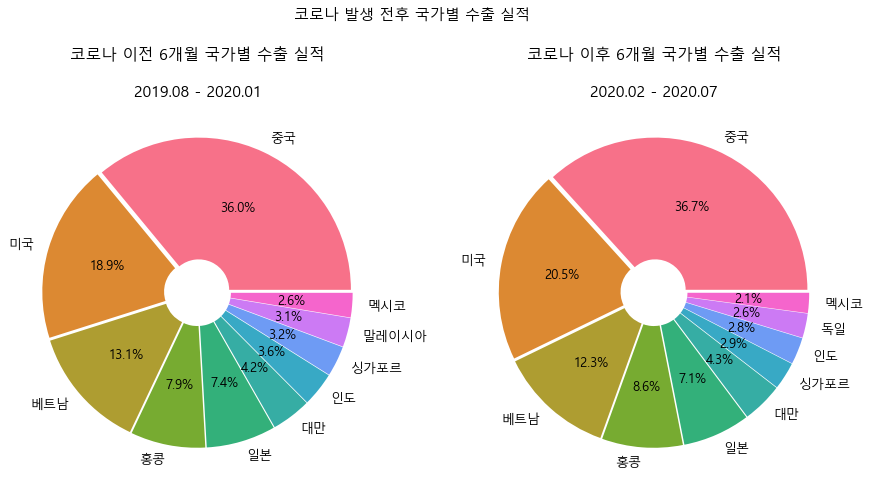

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def export_corona_graph():
    wg = {'width' : 0.8,'linewidth':3}
    explode=[0.02] * len(export_before_corona['국가명']) # 상위 10개국
    colors = sns.color_palette('husl', len(export_before_corona['국가명']))

    plt.figure(figsize=(15,10))
    plt.suptitle('코로나 발생 전후 국가별 수출 실적', fontsize=15, y=0.9)

    plt.subplot(1,2,1)
    plt.title('코로나 이전 6개월 국가별 수출 실적\n\n2019.08 - 2020.01')
    plt.pie(export_before_corona['수출금액'],labels=export_before_corona['국가명'],autopct='%.1f%%',explode = explode, colors = colors, wedgeprops=wg) # 이전
    # plt.legend(import_before_corona['국가명'])

    plt.subplot(1,2,2)
    plt.title('코로나 이후 6개월 국가별 수출 실적\n\n2020.02 - 2020.07')
    plt.pie(export_after_corona['수출금액'],labels=export_after_corona['국가명'],autopct='%.1f%%',explode = explode, colors = colors, wedgeprops=wg) # 이후

    plt.savefig(data_output_path+'export_before_after.png') # GUI에서 시각화 자료 확인
    plt.show()
export_corona_graph()

파이 차트를 통해 코로나 발생 전후 수출 실적에서 중국, 미국, 베트남이 상위를 차지하고 있는 것을 알 수 있다.          
하지만 코로나 발생 전후 수출금액 차이가 큰 상위 10개국을 통해 전반적으로 수출 실적이 감소한 것을 알 수 있다.

In [69]:
export_compare = pd.merge(left = export_before_corona, right = export_after_corona, how='inner', on = '국가명')
export_compare.columns = ['국가명','코로나 이전 수출건수','코로나 이전 수출금액','코로나 이후 수출건수','코로나 이후 수출금액']
export_compare['코로나 전후 수출건수차'] = export_compare['코로나 이후 수출건수'] - export_compare['코로나 이전 수출건수']
export_compare['코로나 전후 수출금액차'] = export_compare['코로나 이후 수출금액'] - export_compare['코로나 이전 수출금액']
export_compare=export_compare.sort_values(by='코로나 전후 수출금액차', ascending = True).reset_index(drop=True)
export_compare
dfi.export(export_compare,data_output_path+'export_compare_df.png')

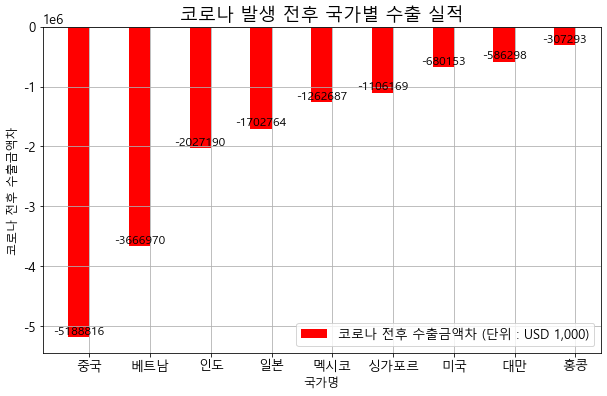

In [70]:
# 그래프 생성
import numpy as np
import matplotlib.pyplot as plt
def export_compare_graph():
    bar_width = 0.35 # 막대 그래프 너비값
    index = np.arange(len(export_compare['국가명']))
    plt.rcParams['axes.unicode_minus'] = False
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot()
    bars = plt.bar(index, export_compare['코로나 전후 수출금액차'], bar_width, align = 'edge',label = '코로나 전후 수출금액차 (단위 : USD 1,000)'
           ,color = ['r' if v < 0 else 'g' for v in export_compare['코로나 전후 수출금액차']])
    for i,b in enumerate(bars):
        ax.text(b.get_x() + b.get_width() * (1/2), b.get_height() + 0.1, export_compare['코로나 전후 수출금액차'].loc[i],fontsize=12, horizontalalignment='center', 
             verticalalignment='bottom') # 값 명시
    plt.title('코로나 발생 전후 국가별 수출 실적', fontsize = 18)
    plt.ylabel('코로나 전후 수출금액차', fontsize = 12)
    plt.xlabel('국가명', fontsize = 12)
    plt.xticks(index + bar_width, export_compare['국가명'])
    plt.legend()
    plt.savefig(data_output_path+'export_compare.png')
    plt.show()
    
export_compare_graph()

전반적으로 코로나 발생 이전에 비해 수출 실적이 줄었으며 그 중 중국의 수출금액차가 가장 크게 나타났다.                               
이러한 코로나 발생 이후 수출금액에 영향을 끼친 주요 수출품목을 중국 품목별 수출 실적을 통해 알아보고자 한다.

#### 중국 품목별 수출 실적

In [71]:
export_china = pd.read_csv(data_input_path+"./중국 품목별 수출실적_2019_08~2020_07.csv", skiprows = range(5,6), header = 4, thousands=',')
export_china.head(10)

,기간,수출입구분,국가명,성질명,중량,금액
0,2019.1,수출,중국,1. 식료 및 직접소비재,55094.9,116200
1,2019.1,수출,중국,2. 원료 및 연료,1636013.7,974200
2,2019.1,수출,중국,3. 경공업품,368170.5,377469
3,2019.1,수출,중국,가. 섬유원료,10411.4,17852
4,2019.1,수출,중국,나. 섬유사,3370.6,16731
5,2019.1,수출,중국,다. 직 물,3963.7,40742
6,2019.1,수출,중국,라. 기타 섬유제품,2609.5,21669
7,2019.1,수출,중국,마. 의 류,1582.4,23902
8,2019.1,수출,중국,바. 목제품,1491.1,18107
9,2019.1,수출,중국,"사. 가죽, 고무 및 신발류",2428.3,31831


In [72]:
# 중국 성질별 수출 실적
export_china = pd.read_csv(data_input_path + "./중국 품목별 수출실적_2019_08~2020_07.csv", skiprows = range(5,6), header = 4, thousands=',').iloc[:,[0,3,4,5]]
export_china.columns=['기간','품목명','수출중량','수출금액']
condition1 = (export_china['품목명'] == '3. 경공업품')
export_china.drop(export_china.loc[condition1].index, inplace=True)
condition2 = (export_china['품목명'] == '4. 중화학 공업품')
export_china.drop(export_china.loc[condition2].index, inplace=True)
export_china.head(10)

,기간,품목명,수출중량,수출금액
0,2019.1,1. 식료 및 직접소비재,55094.9,116200
1,2019.1,2. 원료 및 연료,1636013.7,974200
3,2019.1,가. 섬유원료,10411.4,17852
4,2019.1,나. 섬유사,3370.6,16731
5,2019.1,다. 직 물,3963.7,40742
6,2019.1,라. 기타 섬유제품,2609.5,21669
7,2019.1,마. 의 류,1582.4,23902
8,2019.1,바. 목제품,1491.1,18107
9,2019.1,"사. 가죽, 고무 및 신발류",2428.3,31831
10,2019.1,아. 귀금속 및 보석류,257.4,6315


In [73]:
# 코로나 이전 중국 수출 실적
before_condition = (2019.08 <= export_china['기간']) & (export_china['기간'] < 2020.02)
china_before_corona = export_china[before_condition]

# 코로나 이전 수출 실적 상위 10개 품목
export_china_before_corona=china_before_corona.groupby(['품목명']).sum().reset_index()
export_china_before_corona=export_china_before_corona.sort_values(by='수출금액', ascending=False).reset_index(drop = True).iloc[:,[0,2,3]].head(10)
export_china_before_corona

,품목명,수출중량,수출금액
0,"라. 전기, 전자제품",144130.6,29654451
1,가. 화공품,9613493.7,12627852
2,다. 기계류와 정밀기기,423458.9,10312820
3,2. 원료 및 연료,9477115.2,5617261
4,나. 철강제품,2615406.7,3502222
5,바. 기 타,120193.1,2184618
6,마. 수송장비,414586.4,1684594
7,카. 기 타,455648.2,764692
8,1. 식료 및 직접소비재,359305.3,690454
9,자. 기타 비금속 광물제품,1575880.2,453141


In [74]:
# 코로나 이후 중국 수출 실적
after_condition = (2020.02 <= export_china['기간']) & (export_china['기간'] < 2020.08)
china_after_corona = export_china[after_condition]

# 코로나 이후 수출 실적 상위 10개 품목
export_china_after_corona=china_after_corona.groupby(['품목명']).sum().reset_index()
export_china_after_corona=export_china_after_corona.sort_values(by='수출금액', ascending=False).reset_index(drop = True).iloc[:,[0,2,3]].head(10)
export_china_after_corona

,품목명,수출중량,수출금액
0,"라. 전기, 전자제품",136687.7,29231507
1,가. 화공품,9521874.7,10747133
2,다. 기계류와 정밀기기,440217.6,9367248
3,2. 원료 및 연료,10953158.0,4600526
4,나. 철강제품,3067612.7,3370726
5,바. 기 타,152430.3,2347057
6,카. 기 타,630970.2,806291
7,마. 수송장비,118119.0,785732
8,1. 식료 및 직접소비재,281858.1,673488
9,자. 기타 비금속 광물제품,902362.9,393390


In [75]:
export_china_compare = pd.merge(left = export_china_before_corona, right = export_china_after_corona, how='inner', on = '품목명')
export_china_compare.columns = ['품목명','코로나 이전 수출건수','코로나 이전 수출금액','코로나 이후 수출건수','코로나 이후 수출금액']
export_china_compare['코로나 전후 수출건수차'] = export_china_compare['코로나 이후 수출건수'] - export_china_compare['코로나 이전 수출건수']
export_china_compare['코로나 전후 수출금액차'] = export_china_compare['코로나 이후 수출금액'] - export_china_compare['코로나 이전 수출금액']
export_china_compare=export_china_compare.sort_values(by='코로나 전후 수출금액차', ascending = True).reset_index(drop=True)

# 품목명 : 가. 화공품 -> 화공품 으로 변경
def rename_item(item):
    return item.split('. ')[1]
export_china_compare['품목명'] = export_china_compare['품목명'].apply(rename_item)
export_china_compare
dfi.export(export_china_compare, data_output_path+'export_china_compare_df.png')

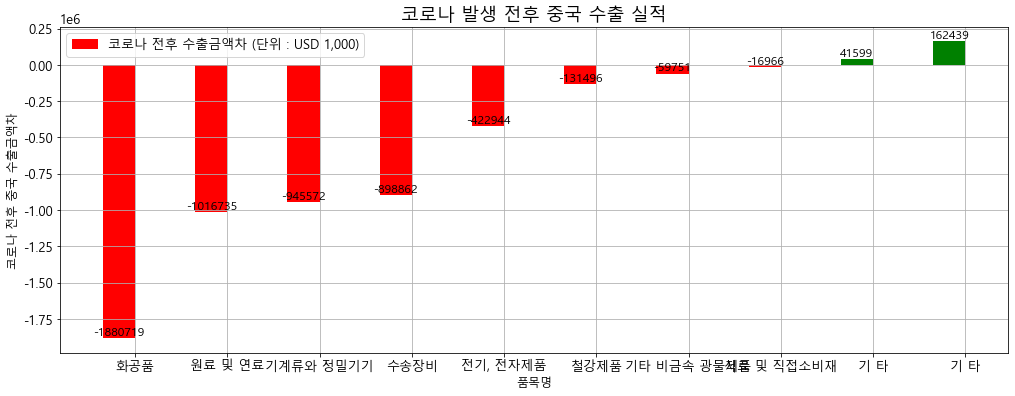

In [76]:
# 그래프 생성
import numpy as np
import matplotlib.pyplot as plt
def export_china_compare_graph():
    bar_width = 0.35 # 막대 그래프 너비값
    index = np.arange(len(export_china_compare['품목명']))
    plt.rcParams['axes.unicode_minus'] = False
    fig = plt.figure(figsize=(17,6))
    ax = fig.add_subplot()
    bars = plt.bar(index, export_china_compare['코로나 전후 수출금액차'], bar_width, align = 'edge',label = '코로나 전후 수출금액차 (단위 : USD 1,000)'
           ,color = ['r' if v < 0 else 'g' for v in export_china_compare['코로나 전후 수출금액차']])
    for i,b in enumerate(bars):
        ax.text(b.get_x() + b.get_width() * (1/2), b.get_height() + 0.1, export_china_compare['코로나 전후 수출금액차'].loc[i],fontsize=12, horizontalalignment='center', 
             verticalalignment='bottom') # 값 명시
    plt.title('코로나 발생 전후 중국 수출 실적', fontsize = 18)
    plt.ylabel('코로나 전후 중국 수출금액차', fontsize = 12)
    plt.xlabel('품목명', fontsize = 12)
    plt.xticks(index + bar_width, export_china_compare['품목명'])
    plt.legend()
    plt.savefig(data_output_path+'export_china_compare.png')
    plt.show()
    
export_china_compare_graph()

수출금액차가 가장 큰 화공품은 관세청 코드에 따르면 의약품, 스티렌, 테레프탈산, 기타 유기 및 무기화합물, 화학비료, 폴리에틸렌, 폴리프로필렌, 폴리에스테르, 기타 인조프라스틱 및 동 제품, 염료와 색소, 기타 화학제품으로 구성되어있다.


완제의약품에 들어가는 원료의약품은 중국과 인도 등에서 수입해오는 비율이 높다.     
              
실제로 인도는 35억 달러 규모의 원료의약품을 해외에서 수입하고 있는데 이 가운데 71.4%에 달하는 25억 달러를 중국에서 수입하고 있다.     
중국 수입비중이 높은 이유로는 중국산 원료가 인도산에 비해 35~40% 저렴한 데 있다.           
다품종 제네릭 출시 및 가격 경쟁력 확보라는 이해관계가 맞물리면서 상대적으로 값싼 단가를 갖춘 중국산 원료의약품 수입액은 2013년부터 1위를 고수하고 있다. 저렴한 원료의약품을 가져와야 1원이라도 가격 경쟁력을 확보할 수 있다는 점에서 중국은 매력적인 원료 수입국이 될 수밖에 없다.            

중국에는 2900여개의 원료제조사들이 있으며 세계 제약회사들의 중국산 의약품 원료 의존도는 70%에 달한다.
이러한 원료의약품에는 마약성 진통 마취제인 레미펜타닐 성분, 해열∙소염 진통제인 덱시부프로펜, 소염·가래 완화용인 L-카르보시스테인 등이 있다. 또한 원충에 의한 감염을 치료하는 항원충제 성분인 메트로니다졸, 항생제, 당뇨약, 에이즈 바이러스(HIV) 치료제, 해열제 이부프로펜 등은 중국 의존도가 높다. 중국마켓리서치그룹 숀 레인 애널리스트는 "중국에서 생산하지 않는 의약품도 기본 성분은 중국에서 얻곤 한다"고 설명했다.             
                       
이와 같이 세계 기초 의약품 시장을 장악하고 있는 중국은 코로나19가 발발했을 당시 다수의 원료공장 생산기지를 폐쇄하였다.
글로벌 제약사에 의약품 원료를 공급하는 중국 내 공장의 상당수가 코로나19 발원지인 중국 우한(武漢)에 있으며 우한에 속한 원료물질 공장은 ▲위창 휴먼웰 제약사 ▲후베이 바이오코즈 헤이렌 ▲우한 그랜드 호요 제약사다. 이곳에서 생산되는 원료의약품은 레미펜타닐염산염, 덱시부프로펜, L-카르보시스테인까지 47개가 해당한다.
                            
씨제이헬스케어, 대한약품공업을 비롯한 국내 5개사가 수입해 패혈증, 괴저성 폐렴, 골수염, 자궁조직염 등 치료를 위한 각종 항생제를 만드는 데 사용하고 있는 중국산 원료의약품 중 하나인 '메트로니다졸'은 코로나19 사태로 도시가 봉쇄된 중국 우한에서 생산되는 제품으로 2월 초부터 공급이 중단됐다. 식품의약품안전처에 공식 등록된 메트로니다졸 생산시설은 우한 업체가 유일하기 때문에 제약사들은 당장 원료 수입처를 바꾸기 힘든 상황이다. 또한 한 달간 현지 생산이 중단돼 공급받지 못한 또 다른 중국산 원료의약품 '시메티딘'을 수입하는 국내업체는 휴온스, 베이스팜, 대신무약 등이 있다.           
               
2018년 기준으로 원료의약품을 중국과 인도에서 각각 33%, 9.5%를 수입하고 있는 우리나라의 2018년 원료의약품 국내 자급도는 식품의약품안전처에 따르면 26.4%에 그치고 있는 실정이다. 마진이 낮은 원료의약품을 자체 생산하기보다 중국, 인도 등으로부터 저가 제품을 수입해 사용하다보니 자급률이 갈수록 낮아지는 실정이다. 특히 국내 제약사들의 원료 수입의존도가 74%에 달하는 와중에 원료 공급의 34%를 담당하는 중국의 원료공장 생산기지 폐쇄와 공항‧항만 봉쇄로 원료의약품 수급에 차질이 생겨 제약 업계의 의약품 개발과 생산 전반에 타격이 발생하였다.

중국의 경우 가장 가깝고도 가장 큰 시장이지만 현지 법인과 까다로운 허가 절차 등으로 진출이 어려워 일부 제약사에 한해서만 수출길을 열어둔 상황이었다. 이러한 상황에서 코로나19로 인한 원료의약품 수급 차질로 인해 완제의약품 생산, 수출 부진으로 인해 화공품(의약품 포함) 수출 금액이 하락한 것을 알 수 있다. 


+ https://www.pharmnews.com/news/articleView.html?idxno=100434
+ https://www.yna.co.kr/view/AKR20200305051751009
+ http://www.bosa.co.kr/news/articleView.html?idxno=2122839
+ https://www.monews.co.kr/news/articleView.html?idxno=210806

# GUI

### 국가별 부문 

In [81]:
from tkinter import *
from PIL import Image,ImageTk
# plt.savefig('시각화_자료_이름.png')
def click_china():
    china_window = Tk() # 새 창
    china_window.title("Export to China")
    china_window.geometry("1100x500")
    china_label= Label(china_window, text = "중국 품목별 수출 실적")
    china_label.pack()
    photo = PhotoImage(file=data_input_path + './export_china_compare.png', master = china_window)
    china_label.config(image=photo)
    china_window.mainloop()
    
def click_export_compare():
    export_compare_window = Tk() # 새 창
    export_compare_window.title("Export Compare")
    export_compare_window.geometry("900x700")
    
    compare = Image.open(data_input_path + "./export_compare.png").resize((600,350),Image.ANTIALIAS)
    photo_compare = ImageTk.PhotoImage(compare, master = export_compare_window)
    
    export_compare_button = Button(export_compare_window, image=photo_compare, command=click_china)
    export_compare_button.pack()
    
    df = Image.open(data_input_path+"./export_compare_df.png").resize((600,250),Image.ANTIALIAS)
    photo_df = ImageTk.PhotoImage(df, master = export_compare_window)
    
    export_compare_label= Label(export_compare_window, text = "코로나 전후 수출금액차\n\n중국 품목별 실적 자료가 궁금하시다면 이미지를 클릭해주세요.",image=photo_df)
    export_compare_label.pack()
    export_compare_window.mainloop()
    
def click_export():
    export_window = Tk() # 새 창
    export_window.title("Export")
    export_window.geometry("900x600")
    export_label= Label(export_window, text = "코로나 전후 수출 실적\n\n코로나 전후 수출금액차 자료가 궁금하시다면 이미지를 클릭해주세요.")
    export_label.pack()
    photo = PhotoImage(file=data_input_path+"./export_before_after.png", master = export_window)
    export_button = Button(export_window, image=photo, command=click_export_compare)
    export_button.pack()
    export_window.mainloop()
    
def click_saudi():
    saudi_window = Tk() # 새 창
    saudi_window.title("Import to Saudi")
    saudi_window.geometry("900x500")
    saudi_label= Label(saudi_window, text = "사우디아라비아 품목별 수입 실적")
    saudi_label.pack()
    photo = PhotoImage(file=data_input_path+'./import_saudi_compare.png', master = saudi_window)
    saudi_label.config(image=photo)
    saudi_window.mainloop()
    
def click_import_compare():
    import_compare_window = Tk() # 새 창
    import_compare_window.title("Import Compare")
    import_compare_window.geometry("900x700")
    
    compare = Image.open(data_input_path+"./import_compare.png").resize((600,350),Image.ANTIALIAS)
    photo_compare = ImageTk.PhotoImage(compare, master = import_compare_window)
    
    import_compare_button = Button(import_compare_window, image=photo_compare, command=click_saudi)
    import_compare_button.pack()
    
    df = Image.open(data_input_path+"./import_compare_df.png").resize((600,250),Image.ANTIALIAS)
    photo_df = ImageTk.PhotoImage(df, master = import_compare_window)
    import_compare_label= Label(import_compare_window, image = photo_df, text = "코로나 전후 수입금액차\n\n사우디아라비아 품목별 실적 자료가 궁금하시다면 이미지를 클릭해주세요.")
    import_compare_label.pack()
    import_compare_window.mainloop()

def click_import():
    import_window = Tk() # 새 창
    import_window.title("Import")
    import_window.geometry("900x600")
    import_label= Label(import_window, text = "코로나 전후 수입 실적\n\n코로나 전후 수입금액차 자료가 궁금하시다면 이미지를 클릭해주세요.")
    import_label.pack()
    photo = PhotoImage(file=data_input_path+"./import_before_after.png", master = import_window)
    import_button = Button(import_window, image=photo, command=click_import_compare)
    import_button.pack()
    import_window.mainloop()

def click_country_button():
    country_window = Tk() # 새 창
    country_window.title("Country")
    country_window.geometry("300x100")
    country_label= Label(country_window, text = "국가별 수출입실적")
    country_label.pack()
    listbox = Listbox(country_window, height=0)
    listbox.insert(0, '코로나 전후 수출 실적')
    listbox.insert(1, '코로나 전후 수입 실적')

    def click_listbox(event):
        select = event.widget.curselection()
        #global photo
        if select[0] == 0: # 수출
            click_export()
        else: # 수입
            click_import()
    listbox.bind('<<ListboxSelect>>',click_listbox) # add
    listbox.pack()
    country_window.mainloop()

### 품목별 부문

In [82]:
def click_item_export():
    item_export_window = Tk() # 새 창
    item_export_window.title("item_export")
    item_export_window.geometry("900x700")
    export_label= Label(item_export_window, text = "상위 10개의 품목별 수출 비중 추이")
    export_label.pack()
    photo = PhotoImage(file=data_input_path+"./image/export_top10.png", master = item_export_window)
    export_label.config(image=photo)
    item_export_window.mainloop()
def click_item_price_mean():
    item_price_mean_window = Tk() # 새 창
    item_price_mean_window.title("item_export")
    item_price_mean_window.geometry("900x1000")
    image = Image.open(data_input_path+"././image/export_price.png").resize((600,700),Image.ANTIALIAS)
    photo_export_price = ImageTk.PhotoImage(image, master = item_price_mean_window)
    export_label= Label(item_price_mean_window, text = "코로나 전후 평균수출금액")
    export_label.pack()
    export_label.config(image=photo_export_price)
    item_price_mean_window.mainloop()
def click__item_price_sub():
    item_price_sub_window = Tk() # 새 창
    item_price_sub_window.title("item_export")
    item_price_sub_window.geometry("900x1000")
    export_label= Label(item_price_sub_window, text = "코로나 전후 평균수출금액차")
    export_label.pack()
    photo = PhotoImage(file=data_input_path+"./image/export_price_sub.png", master = item_price_sub_window)
    export_label.config(image=photo)
    item_price_sub_window.mainloop()
def click_oil_nation():
    oil_nation_window = Tk() # 새 창
    oil_nation_window.title("item_export")
    oil_nation_window.geometry("900x1000")
    image = Image.open(data_input_path+"./image/oil_country.png").resize((600,600),Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(image, master = oil_nation_window)
    export_label= Label(oil_nation_window, text = "코로나 전후 평균수출금액차")
    export_label.pack()
    export_label.config(image=photo)
    oil_nation_window.mainloop()
def click_item_button():
    item_window = Tk() # 새 창
    item_window.title("Item")
    item_window.geometry("300x100")
    item_label= Label(item_window, text = "품목별 수출입실적")
    item_label.pack()
    listbox = Listbox(item_window, height=0)
    listbox.insert(0, '상위 10개의 품목별 수출 비중 추이')
    listbox.insert(1, '코로나 전후 평균수출금액')
    listbox.insert(2, '코로나 전후 평균수출금액차')
    listbox.insert(3, '석유제품 생산국 수출추이')
    def click_listbox(event):
        select = event.widget.curselection()
        #global photo
        if select[0] == 0: # 수출 비중
            click_item_export()
        elif select[0] == 1: # 평균 수출금액
            click_item_price_mean()
        elif select[0] == 2: # 평균 수출금액차
            click__item_price_sub()
        else: # 석유제품 생산국 수출추아
            click_oil_nation()
    listbox.bind('<<ListboxSelect>>',click_listbox) # add
    listbox.pack()
    item_window.mainloop()

### 시·도 별 부문 

In [99]:
def click_city_button():
    city_window = Tk() # 새 창
    city_window.title("City")
    city_window.geometry("300x100")
    city_label= Label(city_window, text = "시도별 수출입실적")
    city_label.pack()
    listbox = Listbox(city_window, width = 50, height=0)
    listbox.insert(0, '시도별 코로나 전, 후 수출 차액')
    listbox.insert(1, '코로나 발생 전, 후 시도별 수출금액 시각화')
    def click_listbox(event):
        select = event.widget.curselection()
        if select[0] == 0:
            click_num1()  # 시도별 코로나 -
        elif select[0] == 1:
            click_num2()  # 시도별 코로나 발생 -
    listbox.bind('<<ListboxSelect>>',click_listbox) # add
    listbox.pack()
    city_window.mainloop()
def click_num1():
    num1_window = Tk()
    num1_window.title('choropleth map')
    num1_window.geometry('600x600')
    num1_label = Label(num1_window, text='시도별 코로나 전, 후 수출 차액')
    num1_label.pack()
    photo = PhotoImage(file = data_input_path + 'corona_map_DataFrame.PNG', master = num1_window)
    num1_label.config(image=photo)
    minus_button = Button(num1_window, text = '손실 지역 조회', command=click_num1_0)
    minus_button.place(x=200, y=570)
    plus_button = Button(num1_window, text = '이득 지역 조회', command=click_num1_1)
    plus_button.place(x=300, y=570)
    num1_window.mainloop()
def click_num1_0():
    num1_0_window = Tk()
    num1_0_window.title('수출 차액 (마이너스)')
    num1_0_window.geometry('900x700')
    num1_0_label = Label(num1_0_window, text='코로나 전, 후 수출 차액 (마이너스)')
    num1_0_label.pack()
    image = Image.open(data_input_path+"price_minus.PNG").resize((600,600),Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(image, master = num1_0_window)
    num1_0_label.config(image=photo)
    num1_0_window.mainloop()
def click_num1_1():
    num1_1_window = Tk()
    num1_1_window.title('수출 차액 (플러스)')
    num1_1_window.geometry('900x700')
    num1_1_label = Label(num1_1_window, text='코로나 전, 후 수출 차액 (플러스)')
    num1_1_label.pack()
    image = Image.open(data_input_path+"price_plus.PNG").resize((600,600),Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(image, master = num1_1_window)
    num1_1_label.config(image=photo)
    num1_1_window.mainloop()
def click_num2():
    num2_window = Tk()
    num2_window.title('수출입 실적')
    num2_window.geometry("600x550")
    num2_label = Label(num2_window, text='시·도 별 수출입 실적')
    num2_label.pack()
    photo = PhotoImage(file=data_input_path + 'regions_export_price.PNG', master=num2_window)
    num2_label.config(image=photo)
    ulsan_button = Button(num2_window, text='울산광역시', command=click_num2_1)
    ulsan_button.place(x= 200, y = 515)
    chungnam_button = Button(num2_window, text='충청남도', command=click_num2_2)
    chungnam_button.place(x = 300, y=515)
    chungbuk_button = Button(num2_window, text='충청북도', command=click_num2_3)
    chungbuk_button.place(x= 400, y=515)
    num2_window.mainloop()
def click_num2_1():
    num2_1_window = Tk()
    num2_1_window.title('울산광역시')
    num2_1_label = Label(num2_1_window, text='울산광역시 수출입 실적')
    num2_1_label.pack()
    image = Image.open(data_input_path+"ulsan_total.PNG").resize((600,600),Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(image, master = num2_1_window)
    ulsan_button = Button(num2_1_window, image=photo,command=click_ulsan_export)
    ulsan_button.pack()
    num2_1_window.mainloop()
def click_ulsan_export():
    ulsan_window = Tk()
    ulsan_window.title('울산광역시')
    ulsan_label = Label(ulsan_window, text='울산광역시 기간별 수출금액 조회')
    ulsan_label.pack()
    image = Image.open(data_input_path+'ulsan_date_total.png').resize((600,600),Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(image, master = ulsan_window)
    ulsan_label.config(image=photo)
    ulsan_window.mainloop()
def click_num2_2():
    num2_2_window = Tk()
    num2_2_window.title('충청남도')
    num2_2_label = Label(num2_2_window, text='충청남도 수출입 실적')
    num2_2_label.pack()
    image = Image.open(data_input_path+'chungnam_total.png').resize((600,600),Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(image, master = num2_2_window)
    ulsan_button = Button(num2_2_window, image=photo,command=click_chungnam_export)
    ulsan_button.pack()
    num2_2_window.mainloop()
def click_chungnam_export():
    chungnam_window = Tk()
    chungnam_window.title('충청남도')
    chungnam_label = Label(chungnam_window, text='충청남도 기간별 수출금액 조회')
    chungnam_label.pack()
    image = Image.open(data_input_path+'chungnam_date_total.png').resize((600,600),Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(image, master = chungnam_window)
    chungnam_label.config(image=photo)
    chungnam_window.mainloop()
def click_num2_3():
    num2_3_window = Tk()
    num2_3_window.title('충청북도')
    num2_3_label = Label(num2_3_window, text='충청북도 수출입 실적')
    num2_3_label.pack()
    image = Image.open(data_input_path+'chungbuk_total.png').resize((600,600),Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(image, master = num2_3_window)
    chungbuk_button = Button(num2_3_window, image=photo,command=click_chungbuk_export)
    chungbuk_button.pack()
    num2_3_window.mainloop()
def click_chungbuk_export():
    chungbuk_window = Tk()
    chungbuk_window.title('충청북도')
    chungbuk_label = Label(chungbuk_window, text='충청북도 기간별 수출금액 조회')
    chungbuk_label.pack()
    image = Image.open(data_input_path+'chungbuk_date_total.png').resize((600,600),Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(image, master = chungbuk_window)
    chungbuk_label.config(image=photo)
    chungbuk_window.mainloop()

### 4) 실행

In [100]:
window = Tk()
window.title("Team 3")
window.geometry("300x150") # 가로 * 세로
label = Label(window, text = "Mini Project #2")
label.pack()
countryButton = Button(window, text="국가별 수출입실적", command=click_country_button)
itemButton = Button(window, text="품목별 수출입실적", command=click_item_button)
cityButton = Button(window, text="시도별 수출입실적", command=click_city_button)
countryButton.pack()
itemButton.pack()
cityButton.pack()
window.mainloop()